# Inicio

In [ ]:
import os
import warnings
warnings.filterwarnings("ignore")  # oculta todos los warnings de Python
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # oculta warnings de TensorFlow

In [ ]:
import os
import tensorflow as tf
import warnings
import subprocess

# Ocultar warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Mostrar dispositivos disponibles
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print("✅ GPU detectada por TensorFlow:")
    for i, gpu in enumerate(gpus):
        print(f"  GPU {i}: {gpu.name}")

    # Mostrar información extendida con nvidia-smi (si está disponible)
    try:
        print("\n📊 Información de la GPU (nvidia-smi):\n")
        gpu_info = subprocess.check_output(["nvidia-smi"]).decode("utf-8")
        print(gpu_info)
    except FileNotFoundError:
        print("ℹ️ El comando 'nvidia-smi' no se encontró. Puede que estés en Colab o sin drivers instalados.")
else:
    print("⚠️ No se detectó ninguna GPU. TensorFlow usará CPU.")

✅ GPU detectada por TensorFlow:
  GPU 0: /physical_device:GPU:0

📊 Información de la GPU (nvidia-smi):

Sun Sep  7 08:14:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.28                 Driver Version: 576.28         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080 Ti   WDDM  |   00000000:0A:00.0  On |                  N/A |
|  0%   50C    P8             43W /  370W |   11090MiB /  12288MiB |      4%      Default |
|                                   

# ENTORNOS


In [ ]:
# !pip install scikeras
# !pip install pandas
# !pip install numpy
# !pip install tensorflow
# !pip install sklearn
# !pip install seaborn

#DATASET

In [ ]:
import pandas as pd
import numpy as np

ruta = r'C:\Users\NaCHO\Mi unidad (martinarjol@gmail.com)\Colab Notebooks\Verano NN\dataset.csv'
ruta2 = '/content/drive/MyDrive/Colab Notebooks/Verano NN/dataset.csv'

df = pd.read_csv(ruta)

df

,Air Pollutant,Air Pollutant Description,Data Aggregation Process,Year,Air Pollution Level,Unit Of Air Pollution Level,Air Quality Station Type,Air Quality Station Area,Longitude,Latitude,Altitude,Province,Quality,Respiratory_diseases_total,Life_expectancy_total,pib,Population,respiratory_deaths_per_100k
0,no2,nitrogen dioxide (air),annual mean / 1 calendar year,2000-01-01,37.381,ug/m3,traffic,urban,-3.6839,41.6711,865.0,Burgos,buena,403,80.47,17.824,347240,116.06
1,no2,nitrogen dioxide (air),annual mean / 1 calendar year,2000-01-01,12.899,ug/m3,industrial,suburban,-0.9133,37.6033,60.0,Murcia,buena,1077,78.42,13.679,1149328,93.71
2,no2,nitrogen dioxide (air),annual mean / 1 calendar year,2000-01-01,35.341,ug/m3,traffic,urban,1.2422,41.1225,23.0,Tarragona,buena,630,79.20,20.226,598533,105.26
3,no2,nitrogen dioxide (air),annual mean / 1 calendar year,2000-01-01,15.752,ug/m3,background,urban,-1.8521,38.9793,686.0,Albacete,buena,355,79.94,12.032,363263,97.73
4,no2,nitrogen dioxide (air),annual mean / 1 calendar year,2000-01-01,17.067,ug/m3,background,suburban,-4.0197,39.8689,500.0,Toledo,buena,568,80.22,13.063,527965,107.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25452,so2,sulphur dioxide (air),annual mean / 1 calendar year,2021-01-01,2.750,ug/m3,traffic,suburban,-5.3837,36.2039,51.0,Cadiz,buena,761,80.75,18.313,1245960,61.08
25453,so2,sulphur dioxide (air),annual mean / 1 calendar year,2021-01-01,4.292,ug/m3,industrial,suburban,-6.8886,37.2193,28.0,Huelva,buena,321,81.16,20.086,525835,61.05
25454,so2,sulphur dioxide (air),annual mean / 1 calendar year,2021-01-01,4.673,ug/m3,traffic,urban,-2.9772,43.3027,4.0,Bizkaia,buena,749,83.70,31.265,1154334,64.89
25455,so2,sulphur dioxide (air),annual mean / 1 calendar year,2021-01-01,4.668,ug/m3,industrial,suburban,-0.8642,41.6742,196.0,Zaragoza,buena,767,83.08,29.279,967452,79.28


In [ ]:
print(df.columns)

Index(['Air Pollutant', 'Air Pollutant Description',
       'Data Aggregation Process', 'Year', 'Air Pollution Level',
       'Unit Of Air Pollution Level', 'Air Quality Station Type',
       'Air Quality Station Area', 'Longitude', 'Latitude', 'Altitude',
       'Province', 'Quality', 'Respiratory_diseases_total',
       'Life_expectancy_total', 'pib', 'Population',
       'respiratory_deaths_per_100k'],
      dtype='object')


In [ ]:
df['Year'] = df['Year'].str[:4].astype(int)

drop_col = ['Air Pollutant Description',
       'Data Aggregation Process', 'Unit Of Air Pollution Level']

df2 = df.drop(columns = drop_col)

df2

,Air Pollutant,Year,Air Pollution Level,Air Quality Station Type,Air Quality Station Area,Longitude,Latitude,Altitude,Province,Quality,Respiratory_diseases_total,Life_expectancy_total,pib,Population,respiratory_deaths_per_100k
0,no2,2000,37.381,traffic,urban,-3.6839,41.6711,865.0,Burgos,buena,403,80.47,17.824,347240,116.06
1,no2,2000,12.899,industrial,suburban,-0.9133,37.6033,60.0,Murcia,buena,1077,78.42,13.679,1149328,93.71
2,no2,2000,35.341,traffic,urban,1.2422,41.1225,23.0,Tarragona,buena,630,79.20,20.226,598533,105.26
3,no2,2000,15.752,background,urban,-1.8521,38.9793,686.0,Albacete,buena,355,79.94,12.032,363263,97.73
4,no2,2000,17.067,background,suburban,-4.0197,39.8689,500.0,Toledo,buena,568,80.22,13.063,527965,107.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25452,so2,2021,2.750,traffic,suburban,-5.3837,36.2039,51.0,Cadiz,buena,761,80.75,18.313,1245960,61.08
25453,so2,2021,4.292,industrial,suburban,-6.8886,37.2193,28.0,Huelva,buena,321,81.16,20.086,525835,61.05
25454,so2,2021,4.673,traffic,urban,-2.9772,43.3027,4.0,Bizkaia,buena,749,83.70,31.265,1154334,64.89
25455,so2,2021,4.668,industrial,suburban,-0.8642,41.6742,196.0,Zaragoza,buena,767,83.08,29.279,967452,79.28


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25457 entries, 0 to 25456
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Air Pollutant                25457 non-null  object 
 1   Year                         25457 non-null  int32  
 2   Air Pollution Level          25457 non-null  float64
 3   Air Quality Station Type     25457 non-null  object 
 4   Air Quality Station Area     25457 non-null  object 
 5   Longitude                    25457 non-null  float64
 6   Latitude                     25457 non-null  float64
 7   Altitude                     25457 non-null  float64
 8   Province                     25457 non-null  object 
 9   Quality                      25457 non-null  object 
 10  Respiratory_diseases_total   25457 non-null  int64  
 11  Life_expectancy_total        25457 non-null  float64
 12  pib                          25457 non-null  float64
 13  Population      

In [ ]:
df2['Province'].unique()

array(['Burgos', 'Murcia', 'Tarragona', 'Albacete', 'Toledo', 'Barcelona',
       'Gipuzkoa', 'Alicante/Alacant', 'Bizkaia', 'Leon', 'Malaga',
       'Guadalajara', 'Madrid', 'Zaragoza', 'Sevilla', 'Valencia',
       'Valladolid', 'Lleida', 'Cantabria', 'Ciudad Real', 'Palencia',
       'Cordoba', 'Almeria', 'Segovia', 'Asturias', 'Castellon/Castello',
       'Granada', 'Cadiz', 'Salamanca', 'Jaen', 'Badajoz', 'Girona',
       'Araba/Alava', 'Navarra', 'Avila', 'Zamora', 'Huelva', 'Teruel',
       'A Coruna', 'Huesca', 'Lugo', 'La Rioja', 'Caceres', 'Pontevedra',
       'Soria', 'Cuenca', 'Ourense'], dtype=object)

# PREDICCIÓN DE QUALITY CON TODOS LOS CONTAMINANTES

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#BLOQUE 2 MEJORADO

In [ ]:
# BLOQUE 2B CON MEJORAS
# Imputación robusta por provincia (en modo mediana): primero rellena por mediana dentro de cada provincia y luego, si queda algo, con mediana global.
# Recorte de outliers con un MAD‑clip por columna numérica (suave, robusto, no lineal).
# Limpieza de columnas sin información: elimina features con varianza cero.
# Estabilidad y eficiencia: orden determinista de features y dtype float32 para ahorrar memoria en X_seq.

# ------------------------------
# ⚙️ CONFIGURACIÓN
# ------------------------------
INTERPOLAR_DATOS = False   # ⬅️ usa mediana en vez de interpolación si False
LOOKBACK_L = 4
HORIZON_H = 1

# ✅ Pequeños ajustes (on/off)
CLIP_OUTLIERS = True       # Mejora 2: recorte robusto de outliers (MAD clip)
DROP_ZERO_VAR = True       # Mejora 3: eliminar columnas sin varianza
CAST_FLOAT32 = True        # Mejora 4: usar float32 para X (memoria/velocidad)
# ------------------------------

import re
import numpy as np
import pandas as pd

# 1) Normalizar columnas
to_snake = lambda s: re.sub(r"_+","_", re.sub(r"[^\w]+","_", str(s).strip())).strip("_").lower()
df2 = df2.copy()
df2.columns = [to_snake(c) for c in df2.columns]

# 2) Variables clave
COL_YEAR      = 'year'
COL_PROV      = 'province'
COL_POLL_NAME = 'air_pollutant'
COL_POLL_VAL  = 'air_pollution_level'
COL_LAT       = 'latitude'
COL_LON       = 'longitude'
COL_TARGET    = 'respiratory_deaths_per_100k'
COL_PIB       = 'pib'
COL_POP       = 'population'

# 3) Pivot de contaminantes
pivot = (df2.pivot_table(index=[COL_PROV, COL_YEAR],
                         columns=COL_POLL_NAME,
                         values=COL_POLL_VAL,
                         aggfunc='mean')
           .reset_index())
pivot.columns = [to_snake(c if isinstance(c, str) else c[-1]) for c in pivot.columns]

# 4) Agregados por provincia-año
agg = (df2.groupby([COL_PROV, COL_YEAR], as_index=False)
         [[COL_LAT, COL_LON, COL_TARGET, COL_PIB, COL_POP]].mean())
agg.columns = [to_snake(c) for c in agg.columns]

# 5) Asegurar todas las combinaciones de provincia-año
prov_col   = to_snake(COL_PROV)
year_col   = to_snake(COL_YEAR)
lat_col    = to_snake(COL_LAT)
lon_col    = to_snake(COL_LON)
target_col = to_snake(COL_TARGET)
pib_col    = to_snake(COL_PIB)
pop_col    = to_snake(COL_POP)

all_years = np.arange(df2[COL_YEAR].min(), df2[COL_YEAR].max() + 1)
all_provs = df2[COL_PROV].unique()
full_index = pd.MultiIndex.from_product([all_provs, all_years], names=[COL_PROV, COL_YEAR])

# Unir pivot y agregados
df_pa = (
    pivot.merge(agg, on=[prov_col, year_col], how='outer')
         .set_index([prov_col, year_col])
         .reindex(full_index)
         .reset_index()
         .rename(columns={COL_PROV: prov_col, COL_YEAR: year_col})
)

# 6) Interpolación o mediana (Mejora 1: mediana por provincia antes que global)
if INTERPOLAR_DATOS:
    df_pa = (
        df_pa
        .groupby(prov_col, group_keys=False)
        .apply(lambda g: g.sort_values(year_col).interpolate(method="linear", limit_direction="both"))
        .reset_index(drop=True)
    )
else:
    # Primero mediana dentro de cada provincia
    num_cols_all = df_pa.select_dtypes(include='number').columns
    df_pa[num_cols_all] = (
        df_pa.groupby(prov_col)[num_cols_all]
             .transform(lambda s: s.fillna(s.median()))
    )
    # Fallback con mediana global si aún quedase algo
    df_pa = df_pa.fillna(df_pa.median(numeric_only=True))

# 7) Relleno de seguridad y recorte de outliers (Mejora 2)
numeric_cols = df_pa.select_dtypes(include='number').columns.difference([target_col])
df_pa[numeric_cols] = df_pa[numeric_cols].replace([np.inf, -np.inf], np.nan)
df_pa[numeric_cols] = df_pa[numeric_cols].fillna(df_pa[numeric_cols].median())

if CLIP_OUTLIERS and len(numeric_cols) > 0:
    # MAD clip por columna (robusto)
    def _mad_clip(s, k=5.0):
        med = np.median(s.values)
        mad = np.median(np.abs(s.values - med))
        if mad == 0 or not np.isfinite(mad):
            return s
        # sigma ≈ 1.4826 * MAD
        sigma = 1.4826 * mad
        lo, hi = med - k*sigma, med + k*sigma
        return s.clip(lower=lo, upper=hi)
    df_pa[numeric_cols] = df_pa[numeric_cols].apply(_mad_clip)

# 8) Construcción de features
cont_cols = [c for c in df_pa.columns if c not in [prov_col, year_col, target_col, lat_col, lon_col, pib_col, pop_col]]
features = cont_cols + [lat_col, lon_col, pib_col, pop_col]

# Codificación cíclica del año
ymin, ymax = int(df_pa[year_col].min()), int(df_pa[year_col].max())
year_norm = (df_pa[year_col] - ymin) / max(1, (ymax - ymin))
df_pa["year_sin"] = np.sin(2*np.pi*year_norm)
df_pa["year_cos"] = np.cos(2*np.pi*year_norm)
features += ['year_sin', 'year_cos']

# Mejora 3: eliminar columnas sin varianza (constantes)
if DROP_ZERO_VAR:
    zero_var = [c for c in features if df_pa[c].nunique(dropna=False) <= 1]
    if zero_var:
        features = [c for c in features if c not in zero_var]

# Mejora 4: orden determinista de features y casteo a float32
features = sorted(features)

# 9) Construcción de secuencias LSTM
def build_sequences(df_pa, feats, target, groupcol, year_col, L=3, H=1, cast_float32=True):
    X_list, y_list, g_list = [], [], []
    for prov, g in df_pa.groupby(groupcol):
        g = g.sort_values(year_col)
        Xg = g[feats].values
        yg = g[target].values
        T  = len(g)
        for t in range(L, T - (H - 1)):
            if not np.isnan(yg[t + (H - 1)]):
                X_list.append(Xg[t-L:t])
                y_list.append(yg[t + (H - 1)])
                g_list.append(prov)
    if len(X_list) == 0:
        raise ValueError("No se generaron secuencias. Revisa L/H o datos disponibles.")
    X = np.stack(X_list)
    if cast_float32:
        X = X.astype(np.float32, copy=False)
    return X, np.array(y_list), np.array(g_list)

X_seq, y_vec, groups = build_sequences(df_pa, features, target_col, prov_col, year_col,
                                       L=LOOKBACK_L, H=HORIZON_H, cast_float32=CAST_FLOAT32)

print(f"✅ Secuencias listas: X → {X_seq.shape} (dtype={X_seq.dtype}), y → {y_vec.shape}, provincias → {np.unique(groups).size}")


✅ Secuencias listas: X → (846, 4, 11) (dtype=float32), y → (846,), provincias → 47


In [ ]:
# df_pa.to_csv("df_pa_provincia_año.csv", index=False)


# OPTIMIZACIÓN BLOQUE 3 LSTM STACKED

In [ ]:
# ===============================================================
# BLOQUE 3 — Stacked RNN (LSTM/GRU) + HPO + Estabilización numérica
# ===============================================================

import os, time, math, numpy as np, pandas as pd, tensorflow as tf
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Masking, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -------------------------------
# ⚙️ CONFIGURACIÓN EDITABLE
# -------------------------------
SEED = 42
np.random.seed(SEED); tf.random.set_seed(SEED)

# I/O
MODEL_DIR = "LSTM-OPT-15"        # 👉 carpeta de salida
os.makedirs(MODEL_DIR, exist_ok=True)

# Cross-validation
N_SPLITS_FINAL = 7               # 👉 nº folds para entrenamiento final
N_SPLITS_HPO   = 7               # 👉 nº folds que usa el HPO (baja a 3–5 si quieres acelerar)
PROV_ALWAYS_TRAIN = []           # 👉 provincias que NO deben caer en test (matchea con `groups`)

# Entrenamiento final
FINAL_EPOCHS     = 30            # 👉 épocas tope en el entrenamiento final
PATIENCE_FINAL   = 10            # 👉 paciencia de EarlyStopping final

# Estabilidad
TARGET_TRANSFORM = "zscore"      # 👉 'zscore' | 'log1p' | None
USE_HUBER        = True          # 👉 usar pérdida Huber en lugar de MSE
HUBER_DELTA      = 1.0
CLIPNORM         = 1.0           # 👉 clipping de gradiente por norma
USE_MIXED_PREC   = True         # 👉 mixed precision (True requiere GPU moderna)
JIT_COMPILE      = False         # 👉 compilar con XLA (puede acelerar)
USE_TFDATA       = True         # 👉 usar tf.data (más rendimiento) en lugar de arrays
USE_GRU          = False         # 👉 usar GRU (≈30–40% más rápida) en vez de LSTM

# ReduceLROnPlateau
USE_REDUCE_LR    = True
RLROP_FACTOR     = 0.5
RLROP_PATIENCE   = 3
RLROP_MIN_LR     = 1e-5

# ====== Guardado de predicciones y TOP-K errores ======
SAVE_PREDICTIONS = True
TOPK_ERRORS      = 50

# ====== Ponderación por provincia en TRAIN ======
WEIGHT_BY_PROVINCE = True     # ← activa/desactiva
WEIGHT_POWER       = 1.0      # peso = 1 / (count ** power)

# HPO (random search)
N_TRIALS        = 15
MAX_EPOCHS_TUNE = 40
PATIENCE_TUNE   = 8
VAL_FRAC        = 0.10
METRIC_PRIMARY  = "r2"         # 'r2' | 'rmse' | 'mae'

SEARCH_SPACE = {
    "UNITS_1":        [32, 48, 64, 96],
    "UNITS_2":        [16, 24, 32, 48],
    "DROPOUT":        [0.0, 0.1, 0.2, 0.3],
    "LR":             [1e-3, 5e-4, 3e-4, 1e-4],
    "BS":             [24, 32, 40, 48, 64, 72],
    "BIDIRECTIONAL":  [True, False],
    "SCALER_TYPE":    ["robust", "standard", "minmax"],
}

# -------------------------------
# 🔧 Utilidades
# -------------------------------
if USE_MIXED_PREC:
    try:
        tf.keras.mixed_precision.set_global_policy("mixed_float16")
        print("✓ mixed_precision activada")
    except Exception as e:
        print("⚠️ No se pudo activar mixed_precision:", e)

def get_scaler(tipo):
    if tipo == "standard": return StandardScaler()
    if tipo == "minmax":   return MinMaxScaler()
    if tipo == "robust":   return RobustScaler()
    raise ValueError("SCALER_TYPE debe ser 'standard', 'minmax' o 'robust'")

class IdentityScaler:
    def fit(self, y): return self
    def transform(self, y): return y
    def inverse_transform(self, y): return y

class Log1pScaler:
    def fit(self, y): return self
    def transform(self, y): return np.log1p(y)
    def inverse_transform(self, y): return np.expm1(y)

def make_y_scaler(kind):
    if kind == "zscore": return StandardScaler()
    if kind == "log1p":  return Log1pScaler()
    return IdentityScaler()

def sample_config(rng):
    cfg = {k: rng.choice(v) for k, v in SEARCH_SPACE.items()}
    if cfg["BIDIRECTIONAL"]:  # recorte ligero de unidades si BiRNN
        cfg["UNITS_1"] = int(max(32, round(cfg["UNITS_1"]*0.75/8)*8))
        cfg["UNITS_2"] = int(max(16, round(cfg["UNITS_2"]*0.75/8)*8))
    return cfg

def make_model(input_shape, cfg):
    rnn1 = (GRU if USE_GRU else LSTM)(cfg["UNITS_1"], return_sequences=True)
    rnn2 = (GRU if USE_GRU else LSTM)(cfg["UNITS_2"], return_sequences=False)
    if cfg["BIDIRECTIONAL"]:
        rnn1 = Bidirectional(rnn1)
        rnn2 = Bidirectional(rnn2)
    layers = [
        Masking(mask_value=0.0, input_shape=input_shape),
        rnn1, Dropout(cfg["DROPOUT"]),
        rnn2, Dropout(cfg["DROPOUT"]),
        Dense(1, dtype="float32" if USE_MIXED_PREC else None)
    ]
    model = Sequential(layers)
    opt = Adam(learning_rate=cfg["LR"], clipnorm=CLIPNORM)
    loss_fn = tf.keras.losses.Huber(delta=HUBER_DELTA) if USE_HUBER else "mse"
    try:
        model.compile(optimizer=opt, loss=loss_fn, metrics=["mae"], jit_compile=JIT_COMPILE)
    except TypeError:
        model.compile(optimizer=opt, loss=loss_fn, metrics=["mae"])
    return model

def make_ds(X, y, bs, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle: ds = ds.shuffle(min(len(X), 10000), reshuffle_each_iteration=True)
    return ds.batch(bs).prefetch(tf.data.AUTOTUNE)

def eval_metrics(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return rmse, mae, r2

def make_province_weights(group_ids, power=1.0, normalize=True):
    """Devuelve sample_weight inverso a la frecuencia por provincia para TRAIN."""
    vals, counts = np.unique(group_ids, return_counts=True)
    invfreq = {p: 1.0 / (c ** power) for p, c in zip(vals, counts)}
    w = np.array([invfreq[p] for p in group_ids], dtype="float32")
    if normalize:
        w *= (len(w) / w.sum())
    return w

# -------------------------------
# 🔎 HPO (Random Search)
# -------------------------------
rng = np.random.RandomState(SEED)
gkf_hpo = GroupKFold(n_splits=N_SPLITS_HPO)
splits_hpo = list(gkf_hpo.split(X_seq, y_vec, groups=groups))

rows = []
print("\n🔎 Buscando hiperparámetros (Random Search):")
t0 = time.time()
for t in range(1, N_TRIALS+1):
    cfg = sample_config(rng)

    # listas de métricas en VALIDACIÓN (por fold)
    r_list, m_list, r2_list = [], [], []

    for tr_idx, te_idx in splits_hpo:
        # solo usamos train->(train/val) para HPO
        X_tr, y_tr = X_seq[tr_idx], y_vec[tr_idx]
        n = len(X_tr)
        if n < 4:
            continue
        val_split = max(1, int((1-VAL_FRAC)*n))
        val_split = min(val_split, n-1)

        X_train, X_val = X_tr[:val_split], X_tr[val_split:]
        y_train, y_val = y_tr[:val_split], y_tr[val_split:]

        # Escalado de X
        xscaler = get_scaler(cfg["SCALER_TYPE"]).fit(X_train.reshape(-1, X_train.shape[2]))
        def scX(X): return xscaler.transform(X.reshape(-1, X.shape[2])).reshape(X.shape)
        X_train_sc, X_val_sc = scX(X_train), scX(X_val)

        # Escalado del objetivo
        yscaler = make_y_scaler(TARGET_TRANSFORM)
        yscaler.fit(y_train.reshape(-1,1))
        y_train_t = yscaler.transform(y_train.reshape(-1,1)).ravel()
        y_val_t   = yscaler.transform(y_val.reshape(-1,1)).ravel()

        # ===== Pesos por provincia en TRAIN (opcional) =====
        tr_idx_train = tr_idx[:val_split]                 # índices reales de TRAIN
        prov_train   = groups[tr_idx_train]
        w_train = make_province_weights(prov_train, WEIGHT_POWER) if WEIGHT_BY_PROVINCE else None

        # Modelo + callbacks
        tf.keras.backend.clear_session()
        model = make_model((X_seq.shape[1], X_seq.shape[2]), cfg)
        callbacks = [EarlyStopping(monitor="val_loss", patience=PATIENCE_TUNE, restore_best_weights=True)]
        if USE_REDUCE_LR:
            callbacks.append(ReduceLROnPlateau(monitor="val_loss",
                                               factor=RLROP_FACTOR, patience=RLROP_PATIENCE,
                                               min_lr=RLROP_MIN_LR, verbose=0))

        # Entrenar
        if USE_TFDATA:
            if WEIGHT_BY_PROVINCE and w_train is not None:
                train_ds = tf.data.Dataset.from_tensor_slices((X_train_sc, y_train_t, w_train)).batch(cfg["BS"]).prefetch(tf.data.AUTOTUNE)
                val_ds   = tf.data.Dataset.from_tensor_slices((X_val_sc,   y_val_t)).batch(cfg["BS"]).prefetch(tf.data.AUTOTUNE)
                model.fit(train_ds, validation_data=val_ds, epochs=MAX_EPOCHS_TUNE, verbose=0, callbacks=callbacks)
            else:
                train_ds = make_ds(X_train_sc, y_train_t, cfg["BS"], shuffle=True)
                val_ds   = make_ds(X_val_sc,   y_val_t,   cfg["BS"], shuffle=False)
                model.fit(train_ds, validation_data=val_ds, epochs=MAX_EPOCHS_TUNE, verbose=0, callbacks=callbacks)
            y_pred_t = model.predict(val_ds, verbose=0).ravel()
        else:
            model.fit(X_train_sc, y_train_t,
                      validation_data=(X_val_sc, y_val_t),
                      epochs=MAX_EPOCHS_TUNE, batch_size=cfg["BS"], verbose=0,
                      callbacks=callbacks,
                      sample_weight=(w_train if WEIGHT_BY_PROVINCE else None))
            y_pred_t = model.predict(X_val_sc, verbose=0).ravel()

        # Desescalar y métricas en escala original
        y_pred = yscaler.inverse_transform(y_pred_t.reshape(-1,1)).ravel()
        rmse, mae, r2 = eval_metrics(y_val, y_pred)
        r_list.append(rmse); m_list.append(mae); r2_list.append(r2)

    if r2_list:
        rm, mm, rr = float(np.mean(r_list)), float(np.mean(m_list)), float(np.mean(r2_list))
    else:
        rm, mm, rr = np.inf, np.inf, -np.inf

    rows.append({"trial": t, **cfg, "rmse_val": rm, "mae_val": mm, "r2_val": rr})
    print(f"Trial {t:02d} | {cfg} -> RMSE(val) {rm:.3f}  MAE(val) {mm:.3f}  R²(val) {rr:.3f}")

# Resultados HPO -> CSVs
hpo_df = pd.DataFrame(rows).sort_values(
    "r2_val" if METRIC_PRIMARY=="r2" else ("rmse_val" if METRIC_PRIMARY=="rmse" else "mae_val"),
    ascending=(METRIC_PRIMARY!="r2")
).reset_index(drop=True)
hpo_df.to_csv(os.path.join(MODEL_DIR, "hpo_trials.csv"), index=False)

best_cfg = hpo_df.iloc[0][["UNITS_1","UNITS_2","DROPOUT","LR","BS","BIDIRECTIONAL","SCALER_TYPE"]].to_dict()
best_scores = hpo_df.iloc[0][["rmse_val","mae_val","r2_val"]].to_dict()
best_cfg_df = pd.DataFrame([{**best_cfg, **best_scores}])
best_cfg_df.to_csv(os.path.join(MODEL_DIR, "hpo_best_config.csv"), index=False)

print(f"\n✅ HPO completado en {time.time()-t0:.1f}s con {len(hpo_df)} configs válidas")
print("\n🥇 Mejor configuración encontrada (según", METRIC_PRIMARY.upper(), "en validación):")
print(best_cfg)
print(f"Scores val → RMSE: {best_scores['rmse_val']:.3f} | MAE: {best_scores['mae_val']:.3f} | R²: {best_scores['r2_val']:.3f}")

# Aplicar mejor config al entrenamiento final
UNITS_1       = int(best_cfg["UNITS_1"])
UNITS_2       = int(best_cfg["UNITS_2"])
DROPOUT       = float(best_cfg["DROPOUT"])
LR            = float(best_cfg["LR"])
BS            = int(best_cfg["BS"])
BIDIRECTIONAL = bool(best_cfg["BIDIRECTIONAL"])
SCALER_TYPE   = str(best_cfg["SCALER_TYPE"])

# -------------------------------
# 🧠 Entrenamiento final por GroupKFold (con y escalada y desescalado en test)
# -------------------------------
gkf_final = GroupKFold(n_splits=N_SPLITS_FINAL)
splits_final = list(gkf_final.split(X_seq, y_vec, groups=groups))

results = []
fold_history = []
models_dir = os.path.join(MODEL_DIR, "best_models")
os.makedirs(models_dir, exist_ok=True)

for fold, (tr_idx, te_idx) in enumerate(splits_final, start=1):
    print(f"\n===== Fold {fold} =====")

    # evitar provincias vetadas en test
    mask_keep = ~np.isin(groups[te_idx], PROV_ALWAYS_TRAIN)
    te_idx = te_idx[mask_keep]

    X_tr, X_te = X_seq[tr_idx], X_seq[te_idx]
    y_tr, y_te = y_vec[tr_idx], y_vec[te_idx]
    prov_te    = groups[te_idx]
    prov_names = ", ".join(sorted(np.unique(prov_te)))

    # split interno train/val (último 10% para val)
    n = len(X_tr)
    val_split = max(1, int(0.9*n))
    val_split = min(val_split, n-1)
    X_train, X_val = X_tr[:val_split], X_tr[val_split:]
    y_train, y_val = y_tr[:val_split], y_tr[val_split:]

    # Escalado X
    xscaler = get_scaler(SCALER_TYPE).fit(X_train.reshape(-1, X_train.shape[2]))
    def scX(X): return xscaler.transform(X.reshape(-1, X.shape[2])).reshape(X.shape)
    X_train_sc, X_val_sc, X_te_sc = scX(X_train), scX(X_val), scX(X_te)

    # Escalado objetivo (fit SOLO con y_train)
    yscaler = make_y_scaler(TARGET_TRANSFORM)
    yscaler.fit(y_train.reshape(-1,1))
    y_train_t = yscaler.transform(y_train.reshape(-1,1)).ravel()
    y_val_t   = yscaler.transform(y_val.reshape(-1,1)).ravel()

    # ===== Pesos por provincia en TRAIN (opcional) =====
    tr_idx_train = tr_idx[:val_split]     # índices reales de TRAIN
    prov_train   = groups[tr_idx_train]
    w_train = make_province_weights(prov_train, WEIGHT_POWER) if WEIGHT_BY_PROVINCE else None

    # Modelo + callbacks
    tf.keras.backend.clear_session()
    cfg_final = {"UNITS_1":UNITS_1,"UNITS_2":UNITS_2,"DROPOUT":DROPOUT,"LR":LR,"BS":BS,
                 "BIDIRECTIONAL":BIDIRECTIONAL,"SCALER_TYPE":SCALER_TYPE}
    model = make_model((X_seq.shape[1], X_seq.shape[2]), cfg_final)

    callbacks = [EarlyStopping(monitor="val_loss", patience=PATIENCE_FINAL, restore_best_weights=True)]
    if USE_REDUCE_LR:
        callbacks.append(ReduceLROnPlateau(monitor="val_loss",
                                           factor=RLROP_FACTOR, patience=RLROP_PATIENCE,
                                           min_lr=RLROP_MIN_LR, verbose=0))

    # Entrenar
    if USE_TFDATA:
        if WEIGHT_BY_PROVINCE and w_train is not None:
            train_ds = tf.data.Dataset.from_tensor_slices((X_train_sc, y_train_t, w_train)).batch(BS).prefetch(tf.data.AUTOTUNE)
            val_ds   = tf.data.Dataset.from_tensor_slices((X_val_sc,   y_val_t)).batch(BS).prefetch(tf.data.AUTOTUNE)
            test_ds  = tf.data.Dataset.from_tensor_slices((X_te_sc, np.zeros_like(y_te))).batch(BS).prefetch(tf.data.AUTOTUNE)
            history = model.fit(train_ds, validation_data=val_ds, epochs=FINAL_EPOCHS, verbose=0, callbacks=callbacks)
            fold_history.append(pd.DataFrame(history.history).assign(fold=fold))
        else:
            train_ds = make_ds(X_train_sc, y_train_t, BS, shuffle=True)
            val_ds   = make_ds(X_val_sc,   y_val_t,   BS, shuffle=False)
            test_ds  = tf.data.Dataset.from_tensor_slices((X_te_sc, np.zeros_like(y_te))).batch(BS).prefetch(tf.data.AUTOTUNE)
            history = model.fit(train_ds, validation_data=val_ds, epochs=FINAL_EPOCHS, verbose=0, callbacks=callbacks)
            fold_history.append(pd.DataFrame(history.history).assign(fold=fold))
        y_pred_t = model.predict(test_ds, verbose=0).ravel()
    else:
        history = model.fit(X_train_sc, y_train_t,
                        validation_data=(X_val_sc, y_val_t),
                        epochs=FINAL_EPOCHS, batch_size=BS, verbose=0,
                        callbacks=callbacks,
                        sample_weight=(w_train if WEIGHT_BY_PROVINCE else None))
        fold_history.append(pd.DataFrame(history.history).assign(fold=fold))
        y_pred_t = model.predict(X_te_sc, verbose=0).ravel()

    # Desescalar y evaluar en TEST (escala original)
    y_pred = yscaler.inverse_transform(y_pred_t.reshape(-1,1)).ravel()
    rmse, mae, r2 = eval_metrics(y_te, y_pred)

    # Baseline para contexto: predecir media de y_train
    y_base = np.full_like(y_te, np.mean(y_train))
    r2_base = r2_score(y_te, y_base)

    # Guardar modelo
    model_name = f"best_fold{fold}_rmse_{rmse:.3f}_r2_{r2:.3f}.keras"
    model.save(os.path.join(models_dir, model_name))

    # ===== (Punto 2) Guardar predicciones y TOP-K errores por fold =====
    if SAVE_PREDICTIONS:
        pred_df = pd.DataFrame({
            "sample_id": te_idx,
            "province":  prov_te,
            "y_true":    y_te,
            "y_pred":    y_pred,
            "abs_err":   np.abs(y_te - y_pred),
            "sq_err":    (y_te - y_pred)**2
        })
        fold_prefix = f"fold{fold}"
        pred_df.to_csv(os.path.join(models_dir, f"predicciones_{fold_prefix}.csv"), index=False)
        topk_df = pred_df.sort_values("abs_err", ascending=False).head(TOPK_ERRORS)
        topk_df.to_csv(os.path.join(models_dir, f"top_errores_{fold_prefix}_top{TOPK_ERRORS}.csv"), index=False)

    results.append({"fold": fold, "rmse": rmse, "mae": mae, "r2": r2,
                    "r2_baseline": r2_base,
                    "n_provincias_test": int(np.unique(prov_te).size),
                    "provincias_test": prov_names,
                    "model": model_name})
    print(f"RMSE={rmse:.3f} | MAE={mae:.3f} | R²={r2:.3f} (baseline {r2_base:.3f}) → {model_name}")

# Resultados finales
results_df = pd.DataFrame(results).sort_values("fold").reset_index(drop=True)
results_df.to_csv(os.path.join(models_dir, "eval_best_models.csv"), index=False)
print("\n=== Resultados globales (final) ===")
display(results_df.round(3))


✓ mixed_precision activada

🔎 Buscando hiperparámetros (Random Search):
Trial 01 | {'UNITS_1': 64, 'UNITS_2': 48, 'DROPOUT': 0.0, 'LR': 0.0003, 'BS': 40, 'BIDIRECTIONAL': False, 'SCALER_TYPE': 'robust'} -> RMSE(val) 19.499  MAE(val) 15.800  R²(val) 0.533
Trial 02 | {'UNITS_1': 32, 'UNITS_2': 24, 'DROPOUT': 0.1, 'LR': 0.0003, 'BS': 40, 'BIDIRECTIONAL': True, 'SCALER_TYPE': 'robust'} -> RMSE(val) 21.309  MAE(val) 17.215  R²(val) 0.444
Trial 03 | {'UNITS_1': 72, 'UNITS_2': 32, 'DROPOUT': 0.3, 'LR': 0.0003, 'BS': 72, 'BIDIRECTIONAL': True, 'SCALER_TYPE': 'standard'} -> RMSE(val) 20.950  MAE(val) 17.022  R²(val) 0.452
Trial 04 | {'UNITS_1': 96, 'UNITS_2': 48, 'DROPOUT': 0.1, 'LR': 0.0005, 'BS': 32, 'BIDIRECTIONAL': False, 'SCALER_TYPE': 'robust'} -> RMSE(val) 19.933  MAE(val) 16.170  R²(val) 0.491
Trial 05 | {'UNITS_1': 32, 'UNITS_2': 48, 'DROPOUT': 0.1, 'LR': 0.0005, 'BS': 64, 'BIDIRECTIONAL': False, 'SCALER_TYPE': 'robust'} -> RMSE(val) 20.434  MAE(val) 16.697  R²(val) 0.487
Trial 06 | {'

,fold,rmse,mae,r2,r2_baseline,n_provincias_test,provincias_test,model
0,1,18.255,13.565,0.618,-0.185,7,"Albacete, Barcelona, Ciudad Real, Lugo, Palenc...",best_fold1_rmse_18.255_r2_0.618.keras
1,2,28.893,22.677,-0.809,-0.059,7,"Badajoz, Caceres, Castellon/Castello, Guadalaj...",best_fold2_rmse_28.893_r2_-0.809.keras
2,3,25.300,18.011,0.470,-0.283,7,"Avila, Cantabria, Granada, Huesca, Leon, Ouren...",best_fold3_rmse_25.300_r2_0.470.keras
3,4,29.508,24.886,0.272,-0.003,7,"Asturias, Cadiz, Girona, La Rioja, Navarra, So...",best_fold4_rmse_29.508_r2_0.272.keras
4,5,18.057,14.745,0.330,-0.514,7,"A Coruna, Araba/Alava, Burgos, Gipuzkoa, Murci...",best_fold5_rmse_18.057_r2_0.330.keras
5,6,29.241,22.921,0.177,-0.054,6,"Almeria, Cuenca, Huelva, Malaga, Segovia, Vall...",best_fold6_rmse_29.241_r2_0.177.keras
6,7,17.632,14.924,0.325,-0.282,6,"Alicante/Alacant, Bizkaia, Cordoba, Madrid, Sa...",best_fold7_rmse_17.632_r2_0.325.keras


In [ ]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 4, 11)             0         
                                                                 
 lstm (LSTM)                 (None, 4, 96)             41472     
                                                                 
 dropout (Dropout)           (None, 4, 96)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                16512     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 58,017
Trainable params: 58,017
Non-traina

Figura guardada en: LSTM-OPT-15\curvas_entrenamiento.png


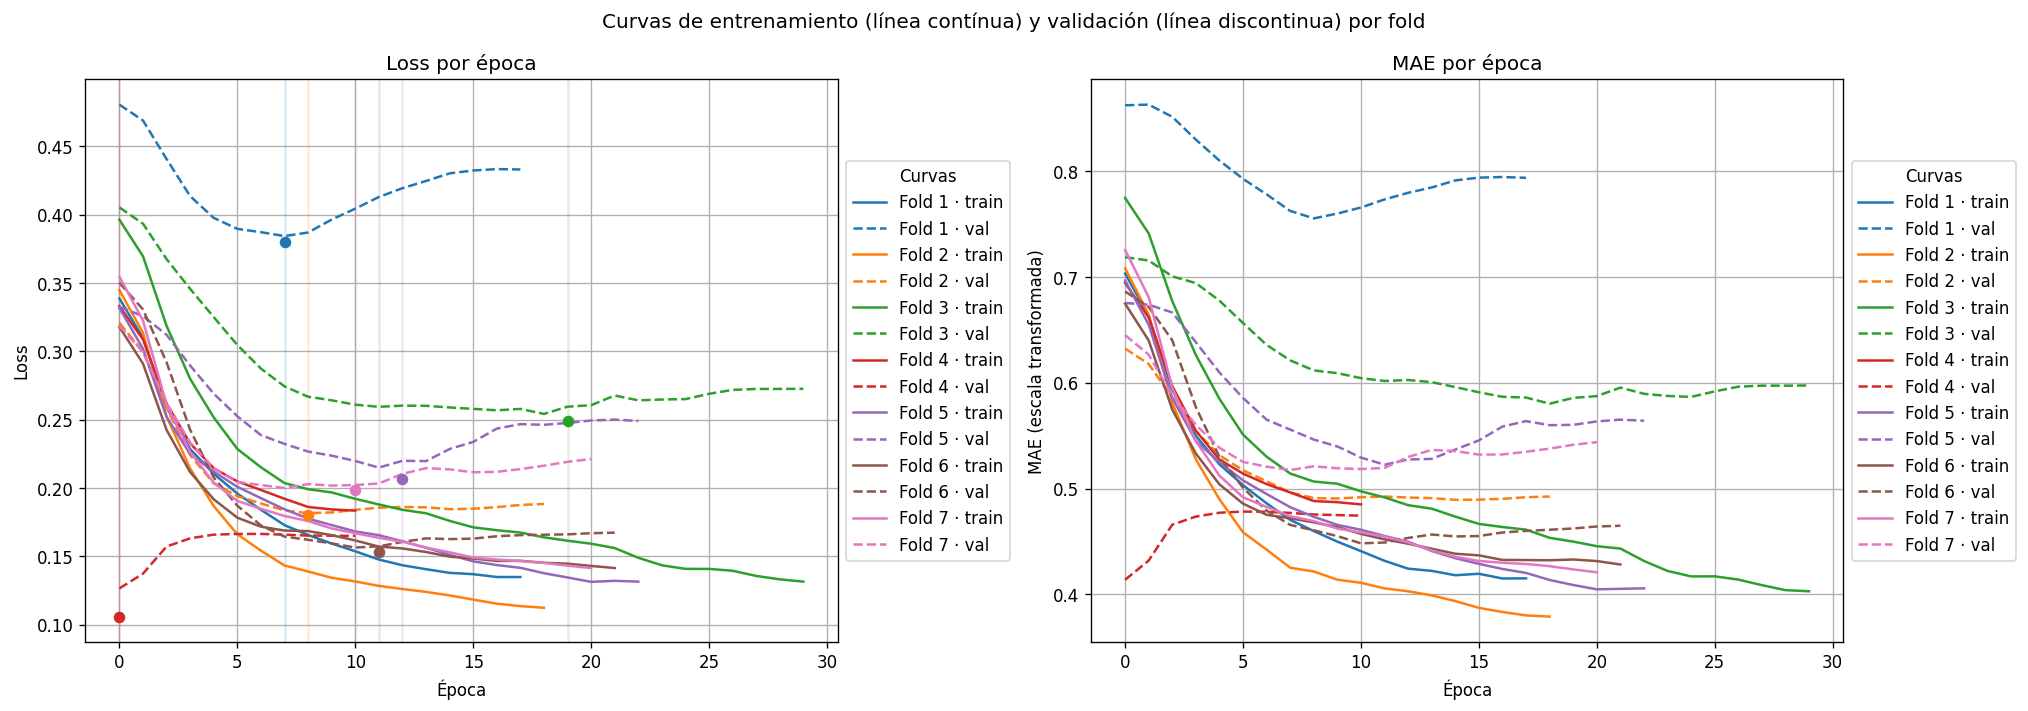

In [ ]:
# BLOQUE 3 EXTRa - VIsualización
# lee fold_history qye está en memoria

# ========= BLOQUE 3 EXTRA – Visualización =========
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# toggles
SMOOTH_K   = 3          # tamaño de ventana para suavizar (0/1 = sin suavizado)
SAVE_FIG   = True       # guardar PNG en MODEL_DIR
FIGSIZE    = (17, 6)    # tamaño de la figura

# 1) Unir historiales
if not isinstance(fold_history, list) or len(fold_history) == 0:
    raise RuntimeError("fold_history está vacío. Asegúrate de hacer append del history por fold.")

df_hist = pd.concat(fold_history, ignore_index=True)

# Añadir columna epoch si no existe
if "epoch" not in df_hist.columns:
    df_hist["epoch"] = df_hist.groupby("fold").cumcount()

# helper de suavizado
def smooth(series, k=SMOOTH_K):
    if k and k > 1:
        return series.rolling(k, min_periods=1, center=True).mean()
    return series

# 2) Crear figura
fig, axs = plt.subplots(1, 2, figsize=FIGSIZE)

# --------- LOSS ----------
for fold in sorted(df_hist['fold'].unique()):
    fdf = df_hist[df_hist['fold'] == fold].copy()
    epochs = fdf["epoch"].to_numpy()
    color  = f"C{(int(fold)-1) % 10}"

    axs[0].plot(epochs, smooth(fdf["loss"]), label=f"Fold {fold} · train", color=color)
    if "val_loss" in fdf.columns:
        axs[0].plot(epochs, smooth(fdf["val_loss"]), ls="--", label=f"Fold {fold} · val", color=color)
        # marcar mejor época (mínimo val_loss)
        best_i = fdf["val_loss"].idxmin()
        best_ep = int(df_hist.loc[best_i, "epoch"])
        best_val = float(df_hist.loc[best_i, "val_loss"])
        axs[0].scatter([best_ep], [best_val], color=color, s=35, zorder=5)
        axs[0].axvline(best_ep, color=color, alpha=0.15)

axs[0].set_title("Loss por época")
axs[0].set_xlabel("Época"); axs[0].set_ylabel("Loss")
axs[0].grid(True)
axs[0].legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Curvas")

# --------- MAE ----------
for fold in sorted(df_hist['fold'].unique()):
    fdf = df_hist[df_hist['fold'] == fold].copy()
    epochs = fdf["epoch"].to_numpy()
    color  = f"C{(int(fold)-1) % 10}"

    if "mae" in fdf.columns:
        axs[1].plot(epochs, smooth(fdf["mae"]), label=f"Fold {fold} · train", color=color)
    if "val_mae" in fdf.columns:
        axs[1].plot(epochs, smooth(fdf["val_mae"]), ls="--", label=f"Fold {fold} · val", color=color)

axs[1].set_title("MAE por época")
axs[1].set_xlabel("Época"); axs[1].set_ylabel("MAE (escala transformada)")
axs[1].grid(True)
axs[1].legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Curvas")

plt.suptitle("Curvas de entrenamiento (línea contínua) y validación (línea discontinua) por fold")
plt.tight_layout()

if SAVE_FIG:
    out = os.path.join(MODEL_DIR, "curvas_entrenamiento.png")
    plt.savefig(out, dpi=150, bbox_inches="tight")
    print("Figura guardada en:", out)

plt.show()
# =============================================================


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# !cp -r /content/LSTM-STACKED-ROB-08 /content/drive/MyDrive/

# Evaluación con el mejor Fold

In [ ]:
rut0 =  "./LSTM-OPT-14/best_models/eval_best_models.csv"
dfr0 = pd.read_csv(rut0)
print(dfr0)

   fold       rmse        mae        r2  r2_baseline  n_provincias_test  \
0     1  20.132121  15.143983  0.531399    -0.176223                  7   
1     2  27.449032  22.311103 -0.622733    -0.088322                  7   
2     3  29.212593  22.396258  0.255530    -0.278952                  7   
3     4  28.961012  24.699467  0.240245    -0.005102                  7   
4     5  22.791094  18.821240 -0.093373    -0.541411                  7   
5     6  28.288014  22.090091  0.208926    -0.048101                  6   
6     7  20.508430  17.040331  0.001336    -0.334840                  6   

                                     provincias_test  \
0  Albacete, Barcelona, Ciudad Real, Lugo, Palenc...   
1  Badajoz, Caceres, Castellon/Castello, Guadalaj...   
2  Avila, Cantabria, Granada, Huesca, Leon, Ouren...   
3  Asturias, Cadiz, Girona, La Rioja, Navarra, So...   
4  A Coruna, Araba/Alava, Burgos, Gipuzkoa, Murci...   
5  Almeria, Cuenca, Huelva, Malaga, Segovia, Vall...   
6  Alic

Usando SCALER_TYPE='robust' y TARGET_TRANSFORM='zscore'
✅ Modelo a usar: ./LSTM-OPT-15/best_models/best_fold1_rmse_18.255_r2_0.618.keras
Figura guardada: LSTM-OPT-15\plots\real_vs_pred_fold1.png


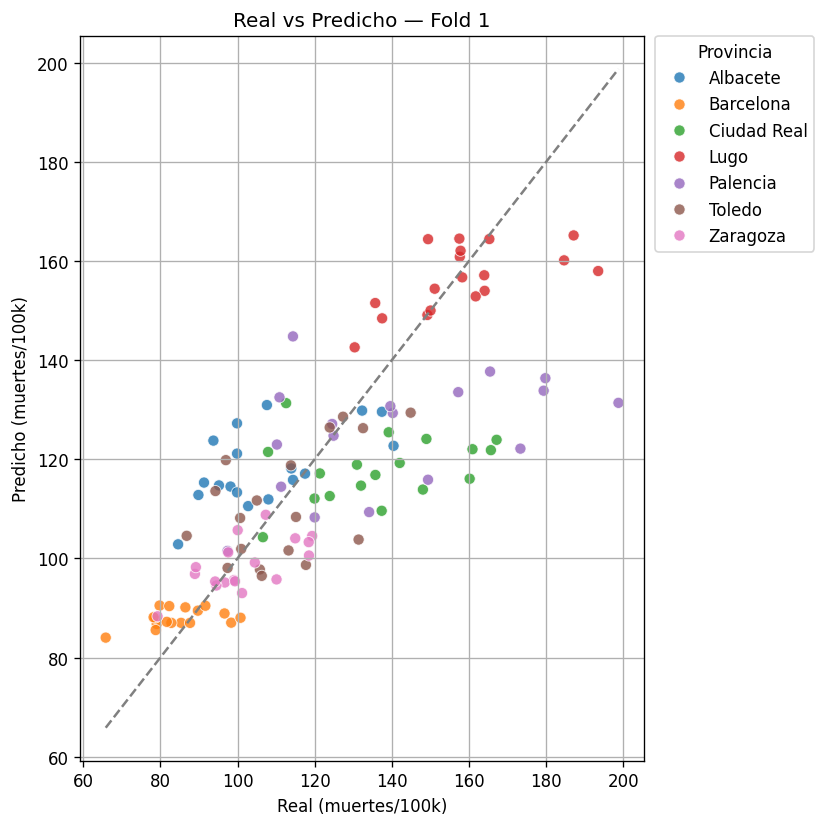

Figura guardada: LSTM-OPT-15\plots\top_mejores_fold1.png


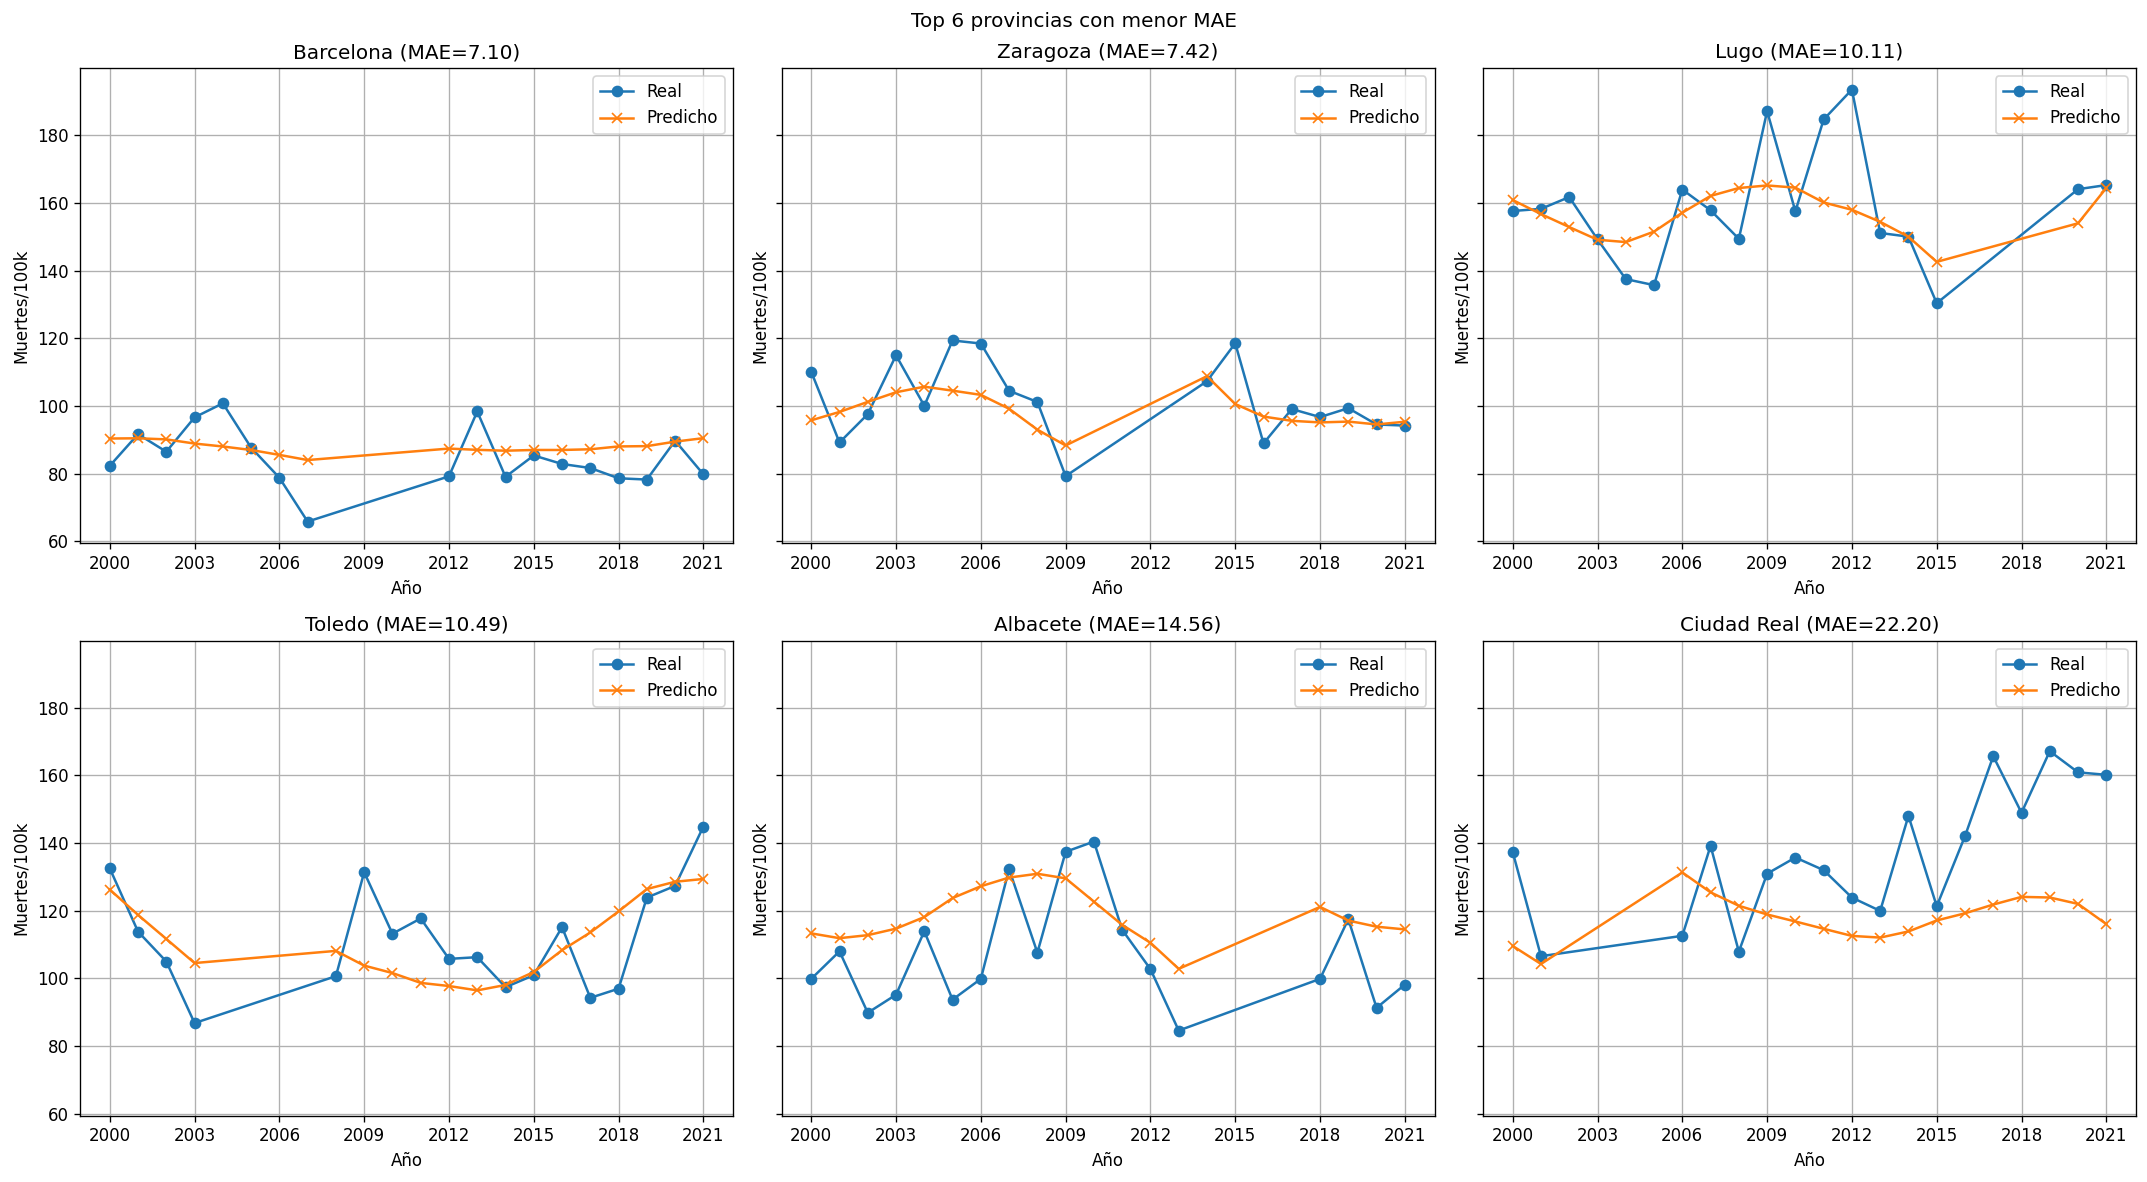

Figura guardada: LSTM-OPT-15\plots\top_peores_fold1.png


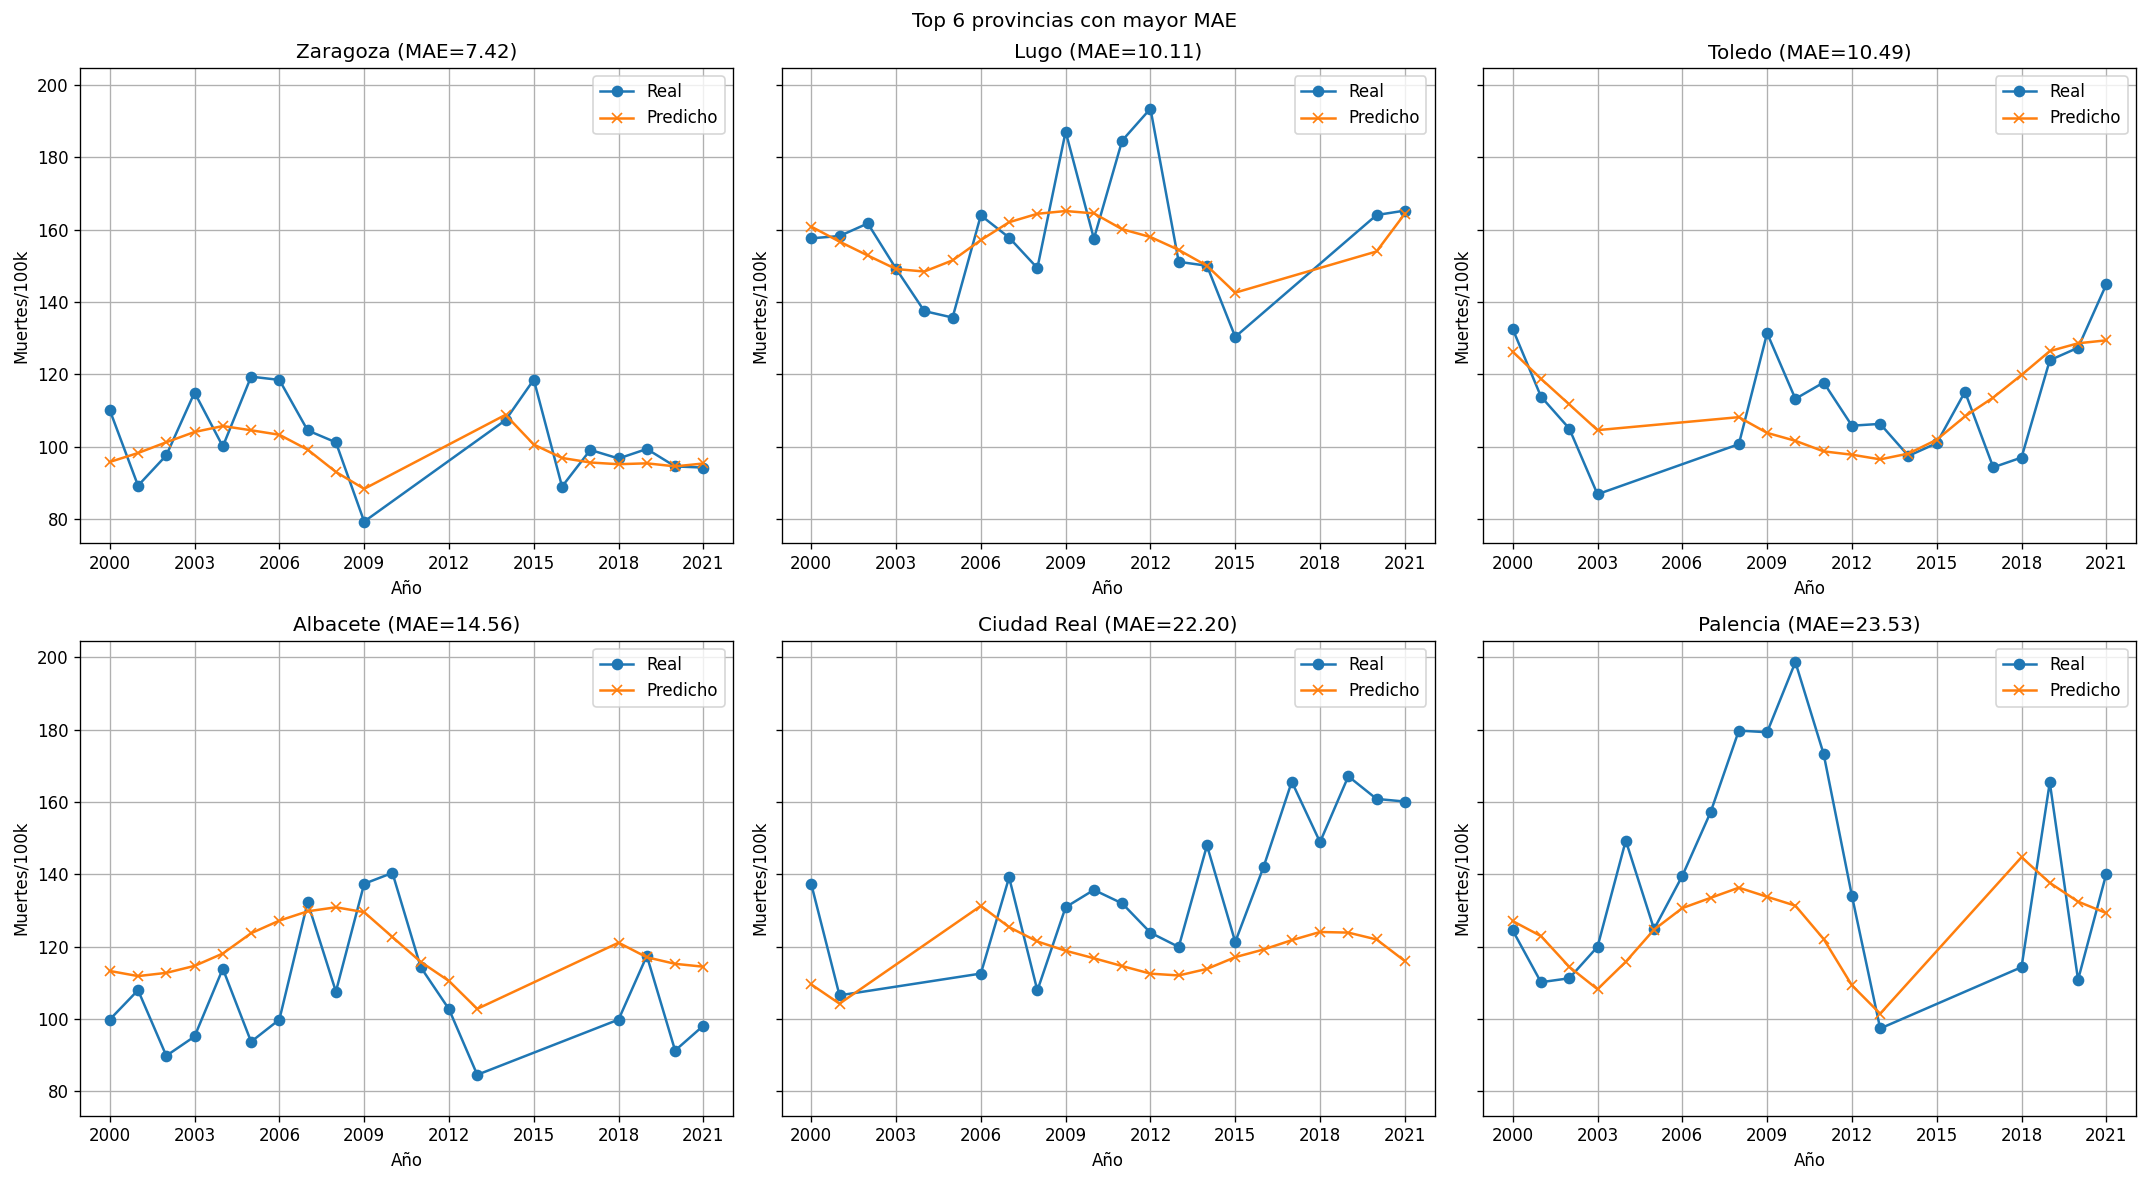

,provincia,MAE,tipo
0,Barcelona,7.100578,Mejor ajuste
1,Zaragoza,7.421079,Mejor ajuste
2,Lugo,10.112669,Mejor ajuste
3,Toledo,10.493840,Mejor ajuste
4,Albacete,14.562950,Mejor ajuste
5,Ciudad Real,22.195518,Mejor ajuste
11,Palencia,23.525101,Peor ajuste


In [ ]:
# =========================================================
# BLOQUE 4 – Visualización real vs. predicho (por fold)
# =========================================================
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# -------------------------
# ⚙️ CONFIG editable
# -------------------------
MODEL_DIR        = "LSTM-OPT-15"   # ← carpeta usada en BLOQUE 3
FOLD_TO_PLOT     = 1               # ← fold que quieres visualizar (1..N_SPLITS_FINAL)
AUTO_PICK_MODEL  = False            # ← True: lee eval_best_models.csv y coge el modelo del fold
MODEL_FILE       = "./LSTM-OPT-15/best_models/best_fold1_rmse_18.255_r2_0.618.keras"            # ← la ruta al .keras si AUTO_PICK_MODEL=False
TARGET_TRANSFORM = "zscore"        # ← DEBE coincidir con BLOQUE 3: 'zscore' | 'log1p' | None
SCALER_TYPE      = None            # ← None: lee hpo_best_config.csv; o fuerza: 'robust'/'standard'/'minmax'
PROV_ALWAYS_TRAIN = []             # ← igual que en BLOQUE 3
SAVE_PNG         = True

# este archivo es el modelo entrenado en el train del fold 1 (con su 10% de val interna)
# los números en el nombre(rmse y r^2) son el rendimiento en el test del fold 1
# El fold es una partición de la validación cruzada, que se produce en train.


# -------------------------
# Utilidades (idénticas a BLOQUE 3)
# -------------------------
def get_scaler(tipo):
    if tipo == "standard": return StandardScaler()
    if tipo == "minmax":   return MinMaxScaler()
    if tipo == "robust":   return RobustScaler()
    raise ValueError("SCALER_TYPE debe ser 'standard', 'minmax' o 'robust'")

class IdentityScaler:
    def fit(self, y): return self
    def transform(self, y): return y
    def inverse_transform(self, y): return y

class Log1pScaler:
    def fit(self, y): return self
    def transform(self, y): return np.log1p(y)
    def inverse_transform(self, y): return np.expm1(y)

def make_y_scaler(kind):
    if kind == "zscore": return StandardScaler()
    if kind == "log1p":  return Log1pScaler()
    return IdentityScaler()

# -------------------------
# 1) Leer config y modelo del fold
# -------------------------
# SCALER_TYPE del HPO si no lo forzas
if SCALER_TYPE is None:
    cfg_csv = os.path.join(MODEL_DIR, "hpo_best_config.csv")
    if not os.path.exists(cfg_csv):
        raise FileNotFoundError(f"No encuentro {cfg_csv}. Ejecuta el BLOQUE 3 primero.")
    SCALER_TYPE = pd.read_csv(cfg_csv).iloc[0]["SCALER_TYPE"]
print(f"Usando SCALER_TYPE='{SCALER_TYPE}' y TARGET_TRANSFORM='{TARGET_TRANSFORM}'")

# Modelo del fold
if AUTO_PICK_MODEL:
    eval_csv = os.path.join(MODEL_DIR, "best_models", "eval_best_models.csv")
    if not os.path.exists(eval_csv):
        raise FileNotFoundError(f"No encuentro {eval_csv}. Ejecuta el BLOQUE 3 (entrenamiento final).")
    row = pd.read_csv(eval_csv)
    if FOLD_TO_PLOT < 1 or FOLD_TO_PLOT > row["fold"].max():
        raise ValueError(f"FOLD_TO_PLOT debe estar entre 1 y {int(row['fold'].max())}")
    model_name = row.set_index("fold").loc[FOLD_TO_PLOT, "model"]
    MODEL_FILE = os.path.join(MODEL_DIR, "best_models", model_name)
else:
    if MODEL_FILE is None:
        raise ValueError("Si AUTO_PICK_MODEL=False debes indicar MODEL_FILE.")

if not os.path.exists(MODEL_FILE):
    raise FileNotFoundError(f"No se encontró el modelo: {MODEL_FILE}")
print("✅ Modelo a usar:", MODEL_FILE)

# -------------------------
# 2) Reconstruir el fold y los escaladores (como en entrenamiento)
# -------------------------
gkf = GroupKFold(n_splits=max(FOLD_TO_PLOT, 7))  # seguro que tenemos suficientes splits
splits = list(gkf.split(X_seq, y_vec, groups=groups))
tr_idx, te_idx = splits[FOLD_TO_PLOT - 1]

# quitar provincias vetadas en test
mask_keep = ~np.isin(groups[te_idx], PROV_ALWAYS_TRAIN)
te_idx = te_idx[mask_keep]

X_tr, X_te = X_seq[tr_idx], X_seq[te_idx]
y_tr, y_te = y_vec[tr_idx], y_vec[te_idx]
prov_te    = groups[te_idx]

# Escalar X con el mismo tipo y "fit" SOLO en X_train (como en BLOQUE 3)
xscaler = get_scaler(SCALER_TYPE).fit(X_tr.reshape(-1, X_tr.shape[2]))
X_te_sc = xscaler.transform(X_te.reshape(-1, X_te.shape[2])).reshape(X_te.shape)

# Escalar y con el mismo TARGET_TRANSFORM (fit SOLO con y_train)
yscaler = make_y_scaler(TARGET_TRANSFORM)
yscaler.fit(y_tr.reshape(-1,1))

# Intentar obtener años si existen (years_vec o df_pa/year_col); si no, usa un índice
try:
    years_te = years_vec[te_idx]         # si tienes un np.array años alineado
except Exception:
    try:
        years_te = df_pa[year_col].values[te_idx]  # si lo tenías en un DataFrame
    except Exception:
        years_te = np.arange(len(y_te))           # fallback: índice

# -------------------------
# 3) Cargar modelo y predecir (desescalar y_pred)
# -------------------------
# Cargar sin compilar (no necesitamos la loss)
model = load_model(MODEL_FILE, compile=False)
y_pred_t = model.predict(X_te_sc, verbose=0).ravel()
y_pred   = yscaler.inverse_transform(y_pred_t.reshape(-1,1)).ravel()

# -------------------------
# 4) Construir DataFrame de resultados
# -------------------------
df_plot = pd.DataFrame({
    "y_real": y_te,
    "y_pred": y_pred,
    "provincia": prov_te,
    "año": years_te
})
df_plot["abs_error"] = np.abs(df_plot["y_real"] - df_plot["y_pred"])

# -------------------------
# 5) Gráficos
# -------------------------
plots_dir = os.path.join(MODEL_DIR, "plots")
os.makedirs(plots_dir, exist_ok=True)

# A) Dispersión general (con leyenda)
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(
    data=df_plot,
    x="y_real", y="y_pred",
    hue="provincia",
    hue_order=sorted(df_plot["provincia"].unique()),  # colores consistentes
    alpha=0.8, s=45
)
lims = [df_plot["y_real"].min(), df_plot["y_real"].max()]
plt.plot(lims, lims, "--", color="gray")
plt.title(f"Real vs Predicho — Fold {FOLD_TO_PLOT}")
plt.xlabel("Real (muertes/100k)")
plt.ylabel("Predicho (muertes/100k)")
plt.grid(True)

# leyenda fuera del gráfico para que quepa
ax.legend(
    title="Provincia",
    bbox_to_anchor=(1.02, 1), loc="upper left",
    borderaxespad=0.0, frameon=True, fontsize=10, ncol=1
)

plt.tight_layout()
if SAVE_PNG:
    out = os.path.join(plots_dir, f"real_vs_pred_fold{FOLD_TO_PLOT}.png")
    plt.savefig(out, dpi=150, bbox_inches="tight")
    print("Figura guardada:", out)
plt.show()

# B) Top-6 mejores/peores provincias por MAE
prov_error = df_plot.groupby("provincia")["abs_error"].mean().sort_values()
mejores = prov_error.head(6); peores = prov_error.tail(6)

def plot_prov_series(title, provs, fname):
    rows = int(np.ceil(len(provs)/3))
    fig, axs = plt.subplots(rows, 3, figsize=(18, 5*rows), sharey=True)
    axs = np.atleast_1d(axs).ravel()
    for ax, prov in zip(axs, provs):
        sub = df_plot[df_plot["provincia"] == prov].sort_values("año")
        anios = sub["año"].values
        ax.plot(anios, sub["y_real"].values, label="Real", marker="o")
        ax.plot(anios, sub["y_pred"].values, label="Predicho", marker="x")
        ax.set_title(f"{prov} (MAE={sub['abs_error'].mean():.2f})")
        ax.set_xlabel("Año"); ax.set_ylabel("Muertes/100k")
        try:
            ax.set_xticks(np.arange(int(anios.min()), int(anios.max())+1, 3))
        except Exception:
            pass
        ax.grid(True); ax.legend()
    plt.suptitle(title)
    plt.tight_layout()
    if SAVE_PNG:
        out = os.path.join(plots_dir, fname)
        plt.savefig(out, dpi=150, bbox_inches="tight")
        print("Figura guardada:", out)
    plt.show()

plot_prov_series("Top 6 provincias con menor MAE", mejores.index, f"top_mejores_fold{FOLD_TO_PLOT}.png")
plot_prov_series("Top 6 provincias con mayor MAE", peores.index,  f"top_peores_fold{FOLD_TO_PLOT}.png")

# C) Tabla resumen (mejores/peores)
df_error = pd.concat([
    mejores.to_frame(name="MAE").assign(tipo="Mejor ajuste"),
    peores.to_frame(name="MAE").assign(tipo="Peor ajuste")
]).reset_index().drop_duplicates(subset="provincia").rename(columns={"index":"provincia"})
display(df_error.sort_values(["tipo","MAE"]))


# Bloque 5


In [ ]:
# ============================================================
# BLOQUE 5 – Exportar predicciones y errores a CSV
# ============================================================
import os, numpy as np, pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------
# ⚙️ CONFIGURACIÓN
# -------------------------------
MODEL_DIR        = "LSTM-OPT-15"    # carpeta donde están los .keras
FOLD_TO_EXPORT   = 1                        # fold a exportar (1..n_splits)
N_SPLITS         = 7
AUTO_PICK_MODEL  = False                    # True: intenta encontrar el modelo por patrón
MODEL_FILE       = "./LSTM-OPT-15/best_models/best_fold1_rmse_18.255_r2_0.618.keras"  # si AUTO_PICK_MODEL=False
PROV_ALWAYS_TRAIN = [] # si 'groups' son nombres; si son ids, pon los ids
TARGET_TRANSFORM = "zscore"                 # el mismo que usaste al entrenar
SCALER_TYPE      = "robust"               # el mismo que usaste al entrenar ('standard'|'minmax'|'robust')
TOPK_ERRORS      = 50                       # guarda además el top-K de errores absolutos
OUT_DIR          = MODEL_DIR                # dónde escribir los CSV

# -------------------------------
# Utilidades de escalado
# -------------------------------
def get_scaler(tipo):
    if tipo == "standard": return StandardScaler()
    if tipo == "minmax":   return MinMaxScaler()
    if tipo == "robust":   return RobustScaler()
    raise ValueError("SCALER_TYPE debe ser 'standard', 'minmax' o 'robust'")

class IdentityScaler:
    def fit(self, y): return self
    def transform(self, y): return y
    def inverse_transform(self, y): return y

class Log1pScaler:
    def fit(self, y): return self
    def transform(self, y): return np.log1p(y)
    def inverse_transform(self, y): return np.expm1(y)

def make_y_scaler(kind):
    if kind == "zscore": return StandardScaler()
    if kind == "log1p":  return Log1pScaler()
    return IdentityScaler()

# -------------------------------
# Validaciones y modelo
# -------------------------------
os.makedirs(OUT_DIR, exist_ok=True)
if not (1 <= FOLD_TO_EXPORT <= N_SPLITS):
    raise ValueError(f"FOLD_TO_EXPORT debe estar entre 1 y {N_SPLITS}")

# Si SCALER_TYPE=None, leer del HPO (por si cambió en tuning)
if SCALER_TYPE is None:
    cfg_csv = os.path.join(MODEL_DIR, "hpo_best_config.csv")
    if not os.path.exists(cfg_csv):
        raise FileNotFoundError(f"No encuentro {cfg_csv}. Ejecuta el BLOQUE 3 primero o fija SCALER_TYPE.")
    SCALER_TYPE = pd.read_csv(cfg_csv).iloc[0]["SCALER_TYPE"]
print(f"Usando SCALER_TYPE='{SCALER_TYPE}' y TARGET_TRANSFORM='{TARGET_TRANSFORM}'")

# Auto-pick del modelo con patrón correcto, si procede
if AUTO_PICK_MODEL:
    import glob
    patt = os.path.join(MODEL_DIR, "best_models", f"best_fold{FOLD_TO_EXPORT}_rmse_*_r2_*.keras")
    cand = sorted(glob.glob(patt))
    if not cand:
        raise FileNotFoundError(f"No se encontró modelo con patrón: {patt}")
    MODEL_FILE = cand[0]

if not os.path.exists(MODEL_FILE):
    raise FileNotFoundError(f"No se encontró el modelo: {MODEL_FILE}")

model = load_model(MODEL_FILE, compile=False)
print(f"✅ Modelo cargado: {MODEL_FILE}")

# -------------------------------
# Construir el fold y preprocesar como en BLOQUE 3
# -------------------------------
gkf = GroupKFold(n_splits=N_SPLITS)
splits = list(gkf.split(X_seq, y_vec, groups=groups))
tr_idx, te_idx = splits[FOLD_TO_EXPORT - 1]

# quitar provincias vetadas del test
mask_keep = ~np.isin(groups[te_idx], PROV_ALWAYS_TRAIN)
te_idx = te_idx[mask_keep]

X_tr, X_te = X_seq[tr_idx], X_seq[te_idx]
y_tr, y_te = y_vec[tr_idx], y_vec[te_idx]
prov_te    = groups[te_idx]

# --- split interno como en BLOQUE 3 (último 10% es validación) ---
n = len(X_tr)
val_split = max(1, int(0.9 * n))
val_split = min(val_split, n - 1)
X_train, X_val = X_tr[:val_split], X_tr[val_split:]
y_train, y_val = y_tr[:val_split], y_tr[val_split:]

# años (si tienes years_vec o df_pa[year_col])
try:
    years_te = years_vec[te_idx]
except Exception:
    try:
        years_te = df_pa[year_col].values[te_idx]
    except Exception:
        years_te = np.arange(len(y_te))

# Escalado X (fit SOLO en X_train, como en el entrenamiento)
xscaler = get_scaler(SCALER_TYPE).fit(X_train.reshape(-1, X_train.shape[2]))
X_te_sc = xscaler.transform(X_te.reshape(-1, X_te.shape[2])).reshape(X_te.shape)

# Transformación de y (fit SOLO en y_train)
yscaler = make_y_scaler(TARGET_TRANSFORM)
yscaler.fit(y_train.reshape(-1, 1))

# -------------------------------
# Predicción y desescalado
# -------------------------------
y_pred_t = model.predict(X_te_sc, verbose=0).ravel()
y_pred   = yscaler.inverse_transform(y_pred_t.reshape(-1,1)).ravel()

# -------------------------------
# DataFrame de resultados y export
# -------------------------------
df_export = pd.DataFrame({
    "fold": FOLD_TO_EXPORT,
    "provincia": prov_te,
    "año": years_te,
    "y_real": y_te,
    "y_pred": y_pred
})
df_export["abs_error"] = np.abs(df_export["y_real"] - df_export["y_pred"])
df_export["sq_error"]  = (df_export["y_real"] - df_export["y_pred"])**2

# rutas
csv_pred_path    = os.path.join(OUT_DIR, f"predicciones_fold{FOLD_TO_EXPORT}.csv")
csv_summary_path = os.path.join(OUT_DIR, f"mae_provincias_fold{FOLD_TO_EXPORT}.csv")
csv_topk_path    = os.path.join(OUT_DIR, f"top_errores_fold{FOLD_TO_EXPORT}_top{TOPK_ERRORS}.csv")

# guardar predicciones completas
df_export.sort_values(["provincia","año"]).to_csv(csv_pred_path, index=False)
print(f"✅ Predicciones guardadas en: {csv_pred_path}")

# resumen por provincia
df_summary = (df_export.groupby("provincia")
              .agg(real_avg=("y_real","mean"),
                   pred_avg=("y_pred","mean"),
                   mae=("abs_error","mean"),
                   rmse=("sq_error", lambda s: np.sqrt(np.mean(s))),
                   n=("y_real","count"))
              .reset_index()
              .sort_values("mae"))
df_summary.to_csv(csv_summary_path, index=False)
print(f"✅ MAE/RMSE por provincia guardado en: {csv_summary_path}")

# top-K errores absolutos
df_export.sort_values("abs_error", ascending=False).head(TOPK_ERRORS).to_csv(csv_topk_path, index=False)
print(f"✅ Top-{TOPK_ERRORS} errores guardado en: {csv_topk_path}")

# Métricas globales del fold
rmse = np.sqrt(np.mean(df_export["sq_error"]))
mae  = df_export["abs_error"].mean()
r2   = r2_score(df_export["y_real"], df_export["y_pred"])
print(f"📈 Métricas del fold {FOLD_TO_EXPORT}: RMSE={rmse:.3f}  MAE={mae:.3f}  R²={r2:.3f}")

# -------------------------------
# Sanity check con el CSV de evaluación del entrenamiento
# -------------------------------
eval_csv = os.path.join(MODEL_DIR, "best_models", "eval_best_models.csv")
if os.path.exists(eval_csv):
    row = pd.read_csv(eval_csv).set_index("fold").loc[FOLD_TO_EXPORT]
    prov_csv  = set([p.strip() for p in str(row["provincias_test"]).split(",")])
    prov_pred = set(map(str, np.unique(prov_te)))
    print("🔎 Coinciden provincias test?:", prov_csv == prov_pred)
    try:
        r2_csv = float(row["r2"])
        print(f"🔎 R² ahora vs CSV: {r2:.3f} vs {r2_csv:.3f}")
    except Exception:
        pass


Usando SCALER_TYPE='robust' y TARGET_TRANSFORM='zscore'
✅ Modelo cargado: ./LSTM-OPT-15/best_models/best_fold1_rmse_18.255_r2_0.618.keras
✅ Predicciones guardadas en: LSTM-OPT-15\predicciones_fold1.csv
✅ MAE/RMSE por provincia guardado en: LSTM-OPT-15\mae_provincias_fold1.csv
✅ Top-50 errores guardado en: LSTM-OPT-15\top_errores_fold1_top50.csv
📈 Métricas del fold 1: RMSE=18.255  MAE=13.565  R²=0.618
🔎 Coinciden provincias test?: True
🔎 R² ahora vs CSV: 0.618 vs 0.618


In [ ]:
rut2 =  "./LSTM-OPT-15/mae_provincias_fold1.csv"
dfr2 = pd.read_csv(rut2)
print(dfr2)

rut3 = "./LSTM-OPT-15/predicciones_fold1.csv"
dfr3 = pd.read_csv(rut3)

display(dfr3)



     provincia    real_avg   pred_avg        mae       rmse   n
0    Barcelona   84.624444   87.36606   6.913320   8.255083  18
1     Zaragoza  101.853889   98.56058   7.372201   9.143731  18
2       Toledo  111.900556  109.89302  10.456022  13.307394  18
3         Lugo  158.583889  155.05410  10.696544  14.089254  18
4     Albacete  107.052778  118.04883  14.381794  16.967435  18
5  Ciudad Real  136.688333  117.91211  22.054542  25.762575  18
6     Palencia  140.594444  125.59574  23.084003  29.219921  18


,fold,provincia,año,y_real,y_pred,abs_error,sq_error
0,1,Albacete,2000,99.88,112.516780,12.636777,159.688134
1,1,Albacete,2001,108.01,111.329820,3.319819,11.021196
2,1,Albacete,2002,89.87,112.424180,22.554179,508.690994
3,1,Albacete,2003,95.20,114.515430,19.315427,373.085706
4,1,Albacete,2004,113.94,118.018845,4.078845,16.636973
...,...,...,...,...,...,...,...
121,1,Zaragoza,2017,99.09,95.198560,3.891437,15.143285
122,1,Zaragoza,2018,96.72,94.909065,1.810935,3.279485
123,1,Zaragoza,2019,99.35,95.326570,4.023431,16.188000
124,1,Zaragoza,2020,94.53,94.633970,0.103972,0.010810


# Bloque 6 - diagnostico por provincia

🧮 Resumen reconstruido desde: predicciones_fold1.csv
📈 Métricas globales fold 1: RMSE=18.255  MAE=13.565  R²=0.618
🖼️ Figura guardada en: ./LSTM-OPT-15/plots/prov_mae_y_dispersion_fold1.png


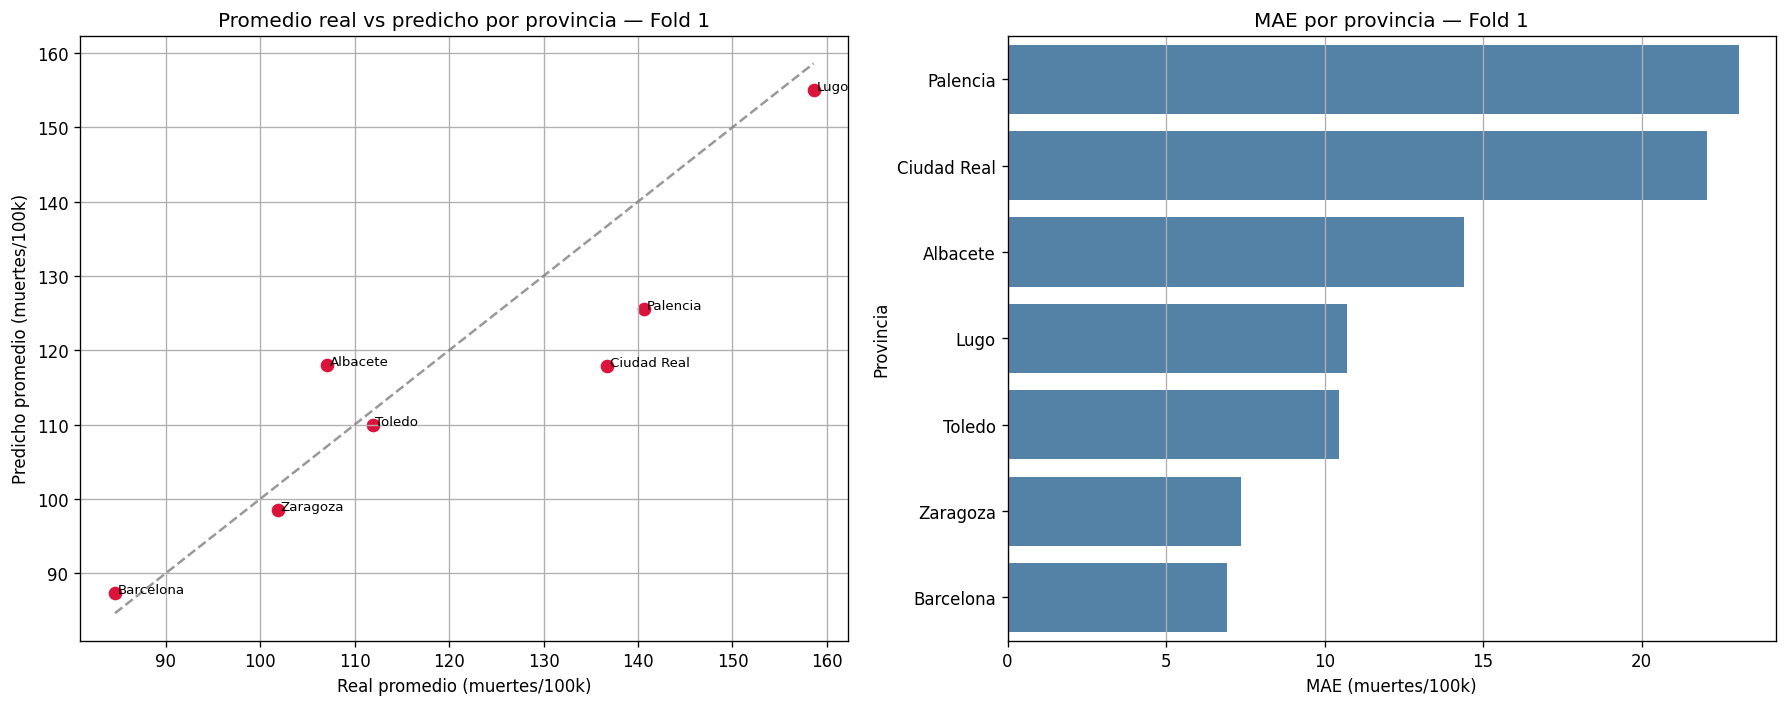


🏅 Mejores provincias (menor MAE):


,provincia,mae,rmse,n
1,Barcelona,6.913320,8.255083,18
6,Zaragoza,7.372201,9.143731,18
5,Toledo,10.456022,13.307394,18
3,Lugo,10.696544,14.089253,18
0,Albacete,14.381794,16.967436,18
2,Ciudad Real,22.054542,25.762574,18


In [ ]:
# =========================================================
# BLOQUE 6 (MANUAL) — Visualización del rendimiento por provincia (por fold)
# =========================================================
# =========================================================
# BLOQUE 6 (MANUAL) — Visualización del rendimiento por provincia (por fold)
# Usa CSVs que tú aportas manualmente (rutas abajo).
# - Si hay resumen: lo usa directamente
# - Si NO hay resumen pero SÍ predicciones: lo reconstruye
# - Si hay ambos, usa el resumen y las predicciones solo para métricas globales
# =========================================================

import os, re, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from unicodedata import normalize as u_norm

# -------- CONFIG MANUAL --------
FOLD_TO_PLOT   = 1
SUMMARY_CSV    = r" "    # ← ruta al mae_provincias_foldX.csv o deja vacío
PREDICTIONS_CSV= r"./LSTM-OPT-15/best_models/predicciones_fold1.csv"  # o deja esta y usará fallbacks
SAVE_PNG       = True
OUT_PNG        = r"./LSTM-OPT-15/plots/prov_mae_y_dispersion_fold1.png"
ORDER_DESC     = True
TOP_LABELS     = 6
# --------------------------------

# ---------- Helpers robustos ----------
def read_csv_auto(path):
    try:
        return pd.read_csv(path)
    except Exception:
        # fallback común si el CSV usa ';'
        return pd.read_csv(path, sep=';')

def to_key(s: str) -> str:
    s = u_norm("NFKD", str(s)).encode("ascii", "ignore").decode("ascii")
    s = re.sub(r"\s+", "_", s.strip().lower())
    s = re.sub(r"[^a-z0-9_]+", "", s)
    return s

def normalize_pred_columns(df: pd.DataFrame) -> pd.DataFrame:
    # Renombrado robusto (sinónimos habituales)
    keymap = {
        "provincia": "provincia", "province": "provincia",
        "y_real": "y_real", "real": "y_real",
        "real_muertes100k": "y_real", "real_muertes_100k": "y_real",
        "realmuertes100k": "y_real", "yreal": "y_real",
        "y_true": "y_real", # Added mapping for 'y_true'

        "y_pred": "y_pred", "pred": "y_pred", "predicho": "y_pred",
        "pred_muertes100k": "y_pred", "pred_muertes_100k": "y_pred",
        "predicho_muertes100k": "y_pred",

        "abs_error": "abs_error", "abserror": "abs_error", "abs_err": "abs_error",
        "sq_error": "sq_error", "sqerr": "sq_error", "se2": "sq_error",
        "ano": "año", "anio": "año", "year": "año", "a_o": "año",
        "fold": "fold"
    }
    # también intentamos mapear títulos largos típicos
    long_to_key = {
        "real_(muertes/100k)": "y_real",
        "predicho_(muertes/100k)": "y_pred"
    }

    newcols = {}
    for c in df.columns:
        k = to_key(c)
        k = long_to_key.get(k, keymap.get(k, k))
        newcols[c] = k
    df = df.rename(columns=newcols)
    return df

# ---- Cargar datos ----
df_summary = None
source_used = None

if isinstance(SUMMARY_CSV, str) and SUMMARY_CSV.strip() == "":
    SUMMARY_CSV = None

# 1) Resumen directo si existe
if SUMMARY_CSV and os.path.exists(SUMMARY_CSV):
    df_summary = read_csv_auto(SUMMARY_CSV)
    source_used = os.path.basename(SUMMARY_CSV)
else:
    # 2) Reconstruir desde predicciones con fallbacks de ruta
    cand_paths = [
        PREDICTIONS_CSV,
        f"./LSTM-OPT-15/predicciones_fold{FOLD_TO_PLOT}.csv",
        f"./LSTM-OPT-15/best_models/predicciones_fold{FOLD_TO_PLOT}.csv",
        f"./predicciones_fold{FOLD_TO_PLOT}.csv",
    ]
    pred_path = next((p for p in cand_paths if p and os.path.exists(p)), None)
    if pred_path is None:
        raise FileNotFoundError("No hay SUMMARY_CSV ni PREDICTIONS_CSV válidos. Indica al menos uno.")
    df_pred = read_csv_auto(pred_path)
    if df_pred.empty:
        raise RuntimeError("El CSV de predicciones está vacío.")

    # Normalizar nombres de columnas y aceptar sinónimos
    df_pred = normalize_pred_columns(df_pred)

    # Filtrar por fold si está la columna
    if "fold" in df_pred.columns:
        df_pred = df_pred[df_pred["fold"] == FOLD_TO_PLOT].copy()
        if df_pred.empty:
            raise RuntimeError(f"No hay filas del fold {FOLD_TO_PLOT} en el CSV de predicciones.")

    # Comprobar columnas mínimas
    req_cols = {"y_real", "y_pred", "provincia"}
    if not req_cols.issubset(set(df_pred.columns)):
        raise ValueError(f"Faltan columnas en predicciones. Requeridas: {req_cols}. "
                         f"Columnas disponibles: {list(df_pred.columns)}")

    # Errores si faltan
    if "abs_error" not in df_pred.columns:
        df_pred["abs_error"] = (df_pred["y_real"] - df_pred["y_pred"]).abs()
    if "sq_error" not in df_pred.columns:
        df_pred["sq_error"]  = (df_pred["y_real"] - df_pred["y_pred"])**2

    # Resumen por provincia
    df_summary = (df_pred.groupby("provincia", as_index=False)
                  .agg(real_avg=("y_real","mean"),
                       pred_avg=("y_pred","mean"),
                       mae=("abs_error","mean"),
                       rmse=("sq_error", lambda s: np.sqrt(np.mean(s))),
                       n=("y_real","count")))
    source_used = os.path.basename(pred_path)
    print(f"🧮 Resumen reconstruido desde: {source_used}")

df_summary["provincia"] = df_summary["provincia"].astype(str)

# ---- Métricas globales del fold (si hay predicciones) ----
try:
    if 'df_pred' not in locals():
        # recarga para métricas si no quedó en memoria
        for p in [PREDICTIONS_CSV,
                  f"./LSTM-OPT-15/predicciones_fold{FOLD_TO_PLOT}.csv",
                  f"./LSTM-OPT-15/best_models/predicciones_fold{FOLD_TO_PLOT}.csv",
                  f"./predicciones_fold{FOLD_TO_PLOT}.csv"]:
            if p and os.path.exists(p):
                df_pred = read_csv_auto(p)
                df_pred = normalize_pred_columns(df_pred)
                break
    if 'df_pred' in locals() and not df_pred.empty:
        if "fold" in df_pred.columns:
            df_pred = df_pred[df_pred["fold"] == FOLD_TO_PLOT].copy()
        if {"y_real","y_pred"}.issubset(df_pred.columns):
            y, yhat = df_pred["y_real"].values, df_pred["y_pred"].values
            rmse_g = float(np.sqrt(np.mean((y - yhat)**2)))
            mae_g  = float(np.mean(np.abs(y - yhat)))
            r2_g   = float(1.0 - np.sum((y - yhat)**2) / np.sum((y - y.mean())**2))
            print(f"📈 Métricas globales fold {FOLD_TO_PLOT}: RMSE={rmse_g:.3f}  MAE={mae_g:.3f}  R²={r2_g:.3f}")
except Exception as e:
    print("⚠️ No se pudieron calcular métricas globales:", e)

# ---- Gráficos ----
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# A) Dispersión promedio real vs predicho por provincia
sns.scatterplot(data=df_summary, x="real_avg", y="pred_avg",
                ax=axs[0], color="crimson", s=80)
min_lim = min(df_summary["real_avg"].min(), df_summary["pred_avg"].min())
max_lim = max(df_summary["real_avg"].max(), df_summary["pred_avg"].max())
axs[0].plot([min_lim, max_lim], [min_lim, max_lim], "--", color="gray", alpha=0.8)
for _, row in df_summary.iterrows():
    axs[0].text(row["real_avg"]+0.3, row["pred_avg"], row["provincia"], fontsize=8)
axs[0].set_title(f"Promedio real vs predicho por provincia — Fold {FOLD_TO_PLOT}")
axs[0].set_xlabel("Real promedio (muertes/100k)")
axs[0].set_ylabel("Predicho promedio (muertes/100k)")
axs[0].grid(True)

# B) Barras de MAE por provincia
df_plot = df_summary.sort_values("mae", ascending=not ORDER_DESC)
sns.barplot(data=df_plot, y="provincia", x="mae", color="steelblue", ax=axs[1])
axs[1].set_title(f"MAE por provincia — Fold {FOLD_TO_PLOT}")
axs[1].set_xlabel("MAE (muertes/100k)")
axs[1].set_ylabel("Provincia")
axs[1].grid(True, axis="x")

plt.tight_layout()
if SAVE_PNG:
    os.makedirs(os.path.dirname(OUT_PNG), exist_ok=True)
    plt.savefig(OUT_PNG, dpi=150, bbox_inches="tight")
    print("🖼️ Figura guardada en:", OUT_PNG)
plt.show()

# ---- Tablas rápidas (mejores/peores por MAE) ----
mejores = df_summary.nsmallest(TOP_LABELS, "mae")[["provincia","mae","rmse","n"]]
peores  = df_summary.nlargest(TOP_LABELS, "mae")[["provincia","mae","rmse","n"]]
print("\n🏅 Mejores provincias (menor MAE):");  display(mejores)
# print("\n⚠️ Peores provincias (mayor MAE):");   display(peores)

# BLOQUE 9 — Entrenamiento final único con todos los datos (sin CV)

este bloque funciona con los mejores hiperparámetros sobre todos los datos

In [ ]:
# ===============================================================
# BLOQUE 9 — Entrenamiento final único con todos los datos (sin CV)
# (con mejoras: shuffle con pesos, guardado de escaladores/config,
#  y guardado/plot de la curva de entrenamiento)
# ===============================================================

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os, json, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 📁 Directorio de salida
final_model_path = os.path.join(MODEL_DIR, "modelo_final_entrenado-11keras")
plots_dir = os.path.join(MODEL_DIR, "plots")
os.makedirs(plots_dir, exist_ok=True)

# ===============================
# ✨ Escalado de X e y
# ===============================

# Escalador de X con la mejor config
xscaler = get_scaler(SCALER_TYPE).fit(X_seq.reshape(-1, X_seq.shape[2]))
X_seq_sc = xscaler.transform(X_seq.reshape(-1, X_seq.shape[2])).reshape(X_seq.shape)

# Escalador de y con la config establecida
yscaler = make_y_scaler(TARGET_TRANSFORM)
yscaler.fit(y_vec.reshape(-1, 1))
y_vec_t = yscaler.transform(y_vec.reshape(-1, 1)).ravel()

# Pesos por provincia (opcional)
w_train = make_province_weights(groups, WEIGHT_POWER) if WEIGHT_BY_PROVINCE else None

# ===============================
# 🧠 Entrenamiento del modelo final
# ===============================
tf.keras.backend.clear_session()
model_final = make_model((X_seq.shape[1], X_seq.shape[2]), best_cfg)

callbacks = [EarlyStopping(monitor="loss", patience=PATIENCE_FINAL, restore_best_weights=True)]
if USE_REDUCE_LR:
    callbacks.append(ReduceLROnPlateau(monitor="loss", factor=RLROP_FACTOR,
                                       patience=RLROP_PATIENCE, min_lr=RLROP_MIN_LR, verbose=0))

if USE_TFDATA:
    if WEIGHT_BY_PROVINCE and w_train is not None:
        # ✅ MEJORA: barajar también cuando hay sample_weight
        train_ds = (tf.data.Dataset
                    .from_tensor_slices((X_seq_sc, y_vec_t, w_train))
                    .shuffle(len(y_vec_t), reshuffle_each_iteration=True)
                    .batch(BS)
                    .prefetch(tf.data.AUTOTUNE))
    else:
        train_ds = make_ds(X_seq_sc, y_vec_t, BS, shuffle=True)
    history = model_final.fit(train_ds, epochs=FINAL_EPOCHS, verbose=1, callbacks=callbacks)
else:
    history = model_final.fit(X_seq_sc, y_vec_t,
                              epochs=FINAL_EPOCHS, batch_size=BS, verbose=1,
                              callbacks=callbacks,
                              sample_weight=(w_train if WEIGHT_BY_PROVINCE else None))

# ===============================
# 💾 Guardar modelo + escaladores + config + curva
# ===============================
model_final.save(final_model_path)
print("\n✅ Modelo final guardado en:", final_model_path)

# ✅ MEJORA: guardar escaladores y metadatos de config
scalers_path = os.path.join(MODEL_DIR, "scalers_final.pkl")
with open(scalers_path, "wb") as f:
    pickle.dump({
        "xscaler": xscaler,
        "yscaler": yscaler,
        "TARGET_TRANSFORM": TARGET_TRANSFORM,
        "SCALER_TYPE": SCALER_TYPE
    }, f)
print("✅ Escaladores guardados en:", scalers_path)

# ✅ MEJORA: guardar la mejor config usada (si existe)
try:
    cfg_path = os.path.join(MODEL_DIR, "best_cfg_final.json")
    with open(cfg_path, "w") as f:
        json.dump(best_cfg, f, indent=2)
    print("✅ Config del modelo guardada en:", cfg_path)
except Exception as e:
    print("⚠️ No se pudo guardar best_cfg:", e)

# ✅ MEJORA: guardar curva de entrenamiento (CSV + PNG)
hist_df = pd.DataFrame(history.history)
hist_csv = os.path.join(plots_dir, "history_final.csv")
hist_df.to_csv(hist_csv, index=False)
print("✅ History guardado en:", hist_csv)

plt.figure(figsize=(10,4.5))
plt.plot(hist_df.get("loss", []), label="loss")
if "mae" in hist_df.columns:
    plt.plot(hist_df["mae"], label="mae")
plt.title("Curva de entrenamiento (modelo final)")
plt.xlabel("Época"); plt.grid(True); plt.legend()
hist_png = os.path.join(plots_dir, "history_final.png")
plt.tight_layout(); plt.savefig(hist_png, dpi=150)
plt.close()
print("🖼️ Curva de entrenamiento guardada en:", hist_png)

# ===============================
# 🔮 Función para predicciones reales con el modelo final
# ===============================
def predecir_con_modelo_final(X_real):
    """
    Recibe datos secuenciales X_real (shape: [n, lookback, features]) y
    devuelve predicciones desescaladas del modelo final entrenado.
    """
    X_real_sc = xscaler.transform(X_real.reshape(-1, X_real.shape[2])).reshape(X_real.shape)
    preds_t = model_final.predict(X_real_sc, verbose=0).ravel()
    return yscaler.inverse_transform(preds_t.reshape(-1, 1)).ravel()

# ✅ Ejemplo:
# y_pred = predecir_con_modelo_final(X_futuro)


Epoch 1/30
22/22 [==============================] - 5s 18ms/step - loss: 0.3507 - mae: 0.7108 - lr: 0.0010
Epoch 2/30
22/22 [==============================] - 0s 9ms/step - loss: 0.2451 - mae: 0.5773 - lr: 0.0010
Epoch 3/30
22/22 [==============================] - 0s 10ms/step - loss: 0.2064 - mae: 0.5183 - lr: 0.0010
Epoch 4/30
22/22 [==============================] - 0s 10ms/step - loss: 0.1859 - mae: 0.4914 - lr: 0.0010
Epoch 5/30
22/22 [==============================] - 0s 10ms/step - loss: 0.1822 - mae: 0.4859 - lr: 0.0010
Epoch 6/30
22/22 [==============================] - 0s 10ms/step - loss: 0.1773 - mae: 0.4742 - lr: 0.0010
Epoch 7/30
22/22 [==============================] - 0s 10ms/step - loss: 0.1719 - mae: 0.4714 - lr: 0.0010
Epoch 8/30
22/22 [==============================] - 0s 10ms/step - loss: 0.1654 - mae: 0.4617 - lr: 0.0010
Epoch 9/30
22/22 [==============================] - 0s 10ms/step - loss: 0.1655 - mae: 0.4582 - lr: 0.0010
Epoch 10/30
22/22 [===================

INFO:tensorflow:Assets written to: LSTM-OPT-15\modelo_final_entrenado-11keras\assets


INFO:tensorflow:Assets written to: LSTM-OPT-15\modelo_final_entrenado-11keras\assets



✅ Modelo final guardado en: LSTM-OPT-15\modelo_final_entrenado-11keras
✅ Escaladores guardados en: LSTM-OPT-15\scalers_final.pkl
✅ Config del modelo guardada en: LSTM-OPT-15\best_cfg_final.json
✅ History guardado en: LSTM-OPT-15\plots\history_final.csv
🖼️ Curva de entrenamiento guardada en: LSTM-OPT-15\plots\history_final.png


# BLOQUE 10 — Visualización del modelo final

✅ Figura guardada en: LSTM-OPT-15\curva_entrenamiento_modelo_final.png


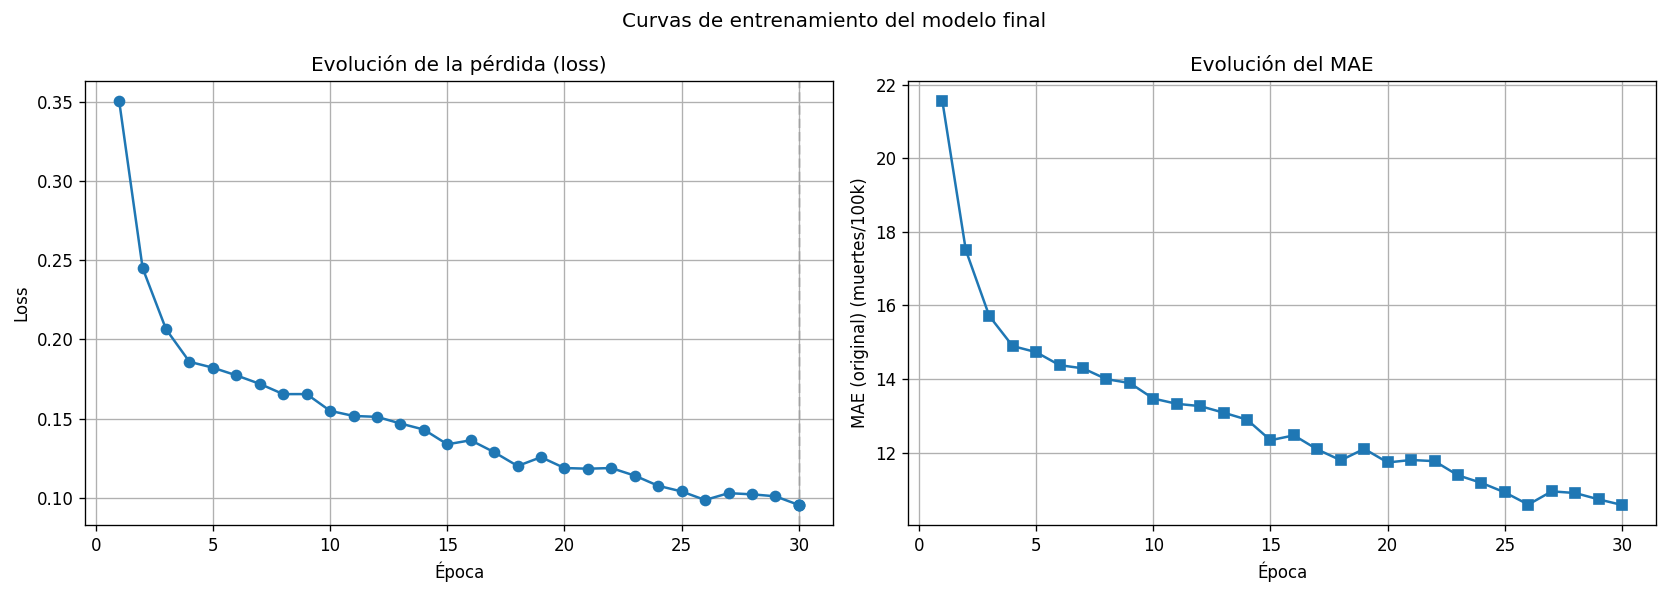

In [ ]:
# ============================================================
# BLOQUE 10 — Visualización de loss y mae del modelo final (MAE desescalado)
# ============================================================
import os, pickle, numpy as np, pandas as pd, matplotlib.pyplot as plt

# ⚙️ Parámetros
FIGSIZE   = (14, 5)
SAVE_FIG  = True
PLOT_PATH = os.path.join(MODEL_DIR, "curva_entrenamiento_modelo_final.png")

# 📈 Cargar history
df_hist_final = None
if 'history' in globals() and hasattr(history, 'history'):
    df_hist_final = pd.DataFrame(history.history)
else:
    hist_csv = os.path.join(MODEL_DIR, "plots", "history_final.csv")
    if not os.path.exists(hist_csv):
        raise FileNotFoundError(
            "No encuentro 'history' en memoria ni el CSV con la curva. "
            f"Ejecuta el Bloque 9 o crea el archivo: {hist_csv}"
        )
    df_hist_final = pd.read_csv(hist_csv)

# Añadir columna epoch si no existe
if "epoch" not in df_hist_final.columns:
    df_hist_final["epoch"] = np.arange(1, len(df_hist_final) + 1)

# =========================
# 🔄 Desescalar el MAE
# =========================
mae_label = "MAE (original)"
df_hist_final["mae_original"] = np.nan

# 1) Intentar obtener yscaler de memoria o de disco
yscaler_obj = None
transform_kind = None
if 'yscaler' in globals():
    yscaler_obj = yscaler
    # si tienes la variable global TARGET_TRANSFORM, úsala
    if 'TARGET_TRANSFORM' in globals():
        transform_kind = TARGET_TRANSFORM
else:
    scalers_path = os.path.join(MODEL_DIR, "scalers_final.pkl")
    if os.path.exists(scalers_path):
        with open(scalers_path, "rb") as f:
            pack = pickle.load(f)
        yscaler_obj = pack.get("yscaler", None)
        transform_kind = pack.get("TARGET_TRANSFORM", None)

# 2) Convertir MAE si existe la columna 'mae'
if "mae" in df_hist_final.columns:
    if (transform_kind is None) or (str(transform_kind).lower() == "none"):
        # sin transformación → ya está en escala original
        df_hist_final["mae_original"] = df_hist_final["mae"]
    elif str(transform_kind).lower() == "zscore":
        # y_t = (y - mu)/sigma ⇒ |y - ŷ| = sigma * |y_t - ŷ_t|
        if yscaler_obj is not None and hasattr(yscaler_obj, "scale_"):
            sigma = float(np.ravel(yscaler_obj.scale_)[0])
            df_hist_final["mae_original"] = df_hist_final["mae"] * sigma
        else:
            print("⚠️ No se encontró 'yscaler.scale_' para desescalar; se muestra MAE transformado.")
            df_hist_final["mae_original"] = df_hist_final["mae"]
    elif str(transform_kind).lower() == "log1p":
        # No es lineal: no se puede desescalar MAE por época con precisión solo con el history
        print("⚠️ TARGET_TRANSFORM='log1p': no se puede desescalar el MAE por época con exactitud solo con el history.")
        df_hist_final["mae_original"] = np.nan
        mae_label = "MAE (transformado)"
    else:
        print(f"⚠️ Transformación de y desconocida: {transform_kind}. Se mostrará MAE transformado.")
        df_hist_final["mae_original"] = df_hist_final["mae"]
else:
    print("⚠️ El history no contiene la métrica 'mae'.")

# 🎨 Graficar
fig, axs = plt.subplots(1, 2, figsize=FIGSIZE)

# Subplot 1: LOSS
axs[0].plot(df_hist_final["epoch"], df_hist_final["loss"], marker="o")
# marcar mejor época (mínimo loss)
best_i   = df_hist_final["loss"].idxmin()
best_ep  = int(df_hist_final.loc[best_i, "epoch"])
best_val = float(df_hist_final.loc[best_i, "loss"])
axs[0].scatter([best_ep], [best_val], s=40, zorder=5)
axs[0].axvline(best_ep, color="gray", alpha=0.3, linestyle="--")
axs[0].set_title("Evolución de la pérdida (loss)")
axs[0].set_xlabel("Época")
axs[0].set_ylabel("Loss")
axs[0].grid(True)

# Subplot 2: MAE desescalado (si disponible)
if "mae" in df_hist_final.columns:
    if df_hist_final["mae_original"].notna().any():
        axs[1].plot(df_hist_final["epoch"], df_hist_final["mae_original"], marker="s")
        axs[1].set_ylabel(f"{mae_label} (muertes/100k)" if mae_label=="MAE (original)" else mae_label)
    else:
        axs[1].plot(df_hist_final["epoch"], df_hist_final["mae"], marker="s")
        axs[1].set_ylabel("MAE (transformado)")
    axs[1].set_title("Evolución del MAE")
    axs[1].set_xlabel("Época")
    axs[1].grid(True)
else:
    axs[1].axis("off")
    axs[1].text(0.5, 0.5, "Sin métrica 'mae' en history", ha="center", va="center")

plt.suptitle("Curvas de entrenamiento del modelo final")
plt.tight_layout()

# 💾 Guardar
if SAVE_FIG:
    os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)
    plt.savefig(PLOT_PATH, dpi=150, bbox_inches="tight")
    print("✅ Figura guardada en:", PLOT_PATH)

plt.show()



Evaluación global del modelo final (no ponderada):
RMSE: 12.333 | MAE: 9.711 | R²: 0.835
Evaluación ponderada por provincia:
RMSE_w: 12.333 | MAE_w: 9.711 | R²_w: 0.835


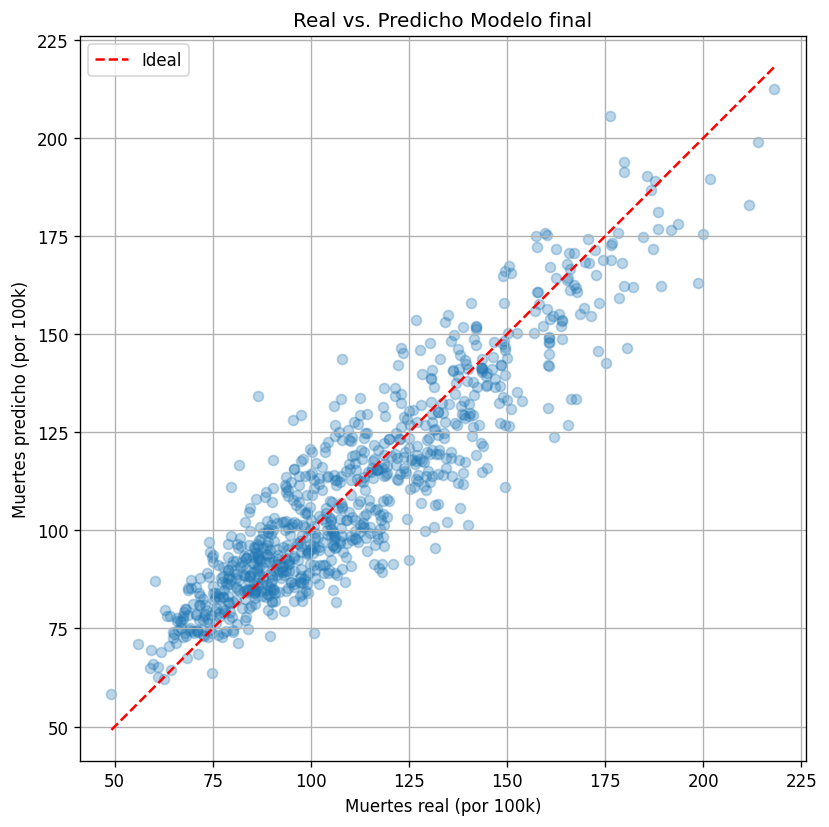

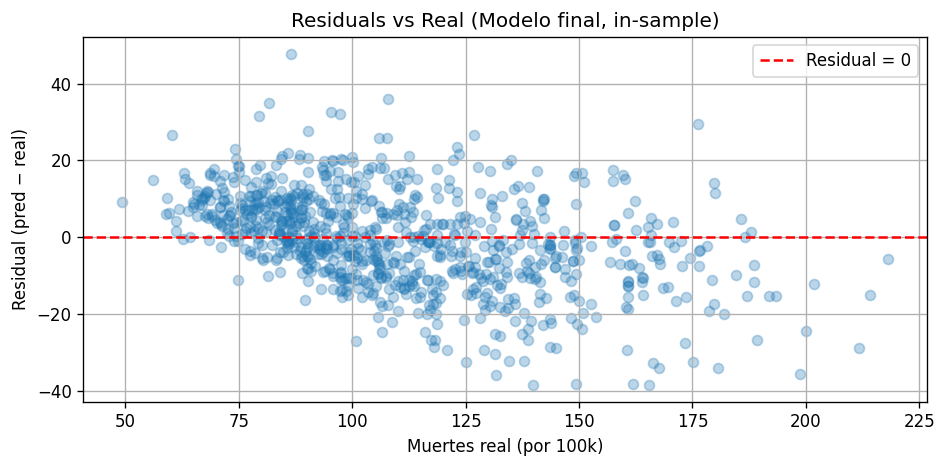

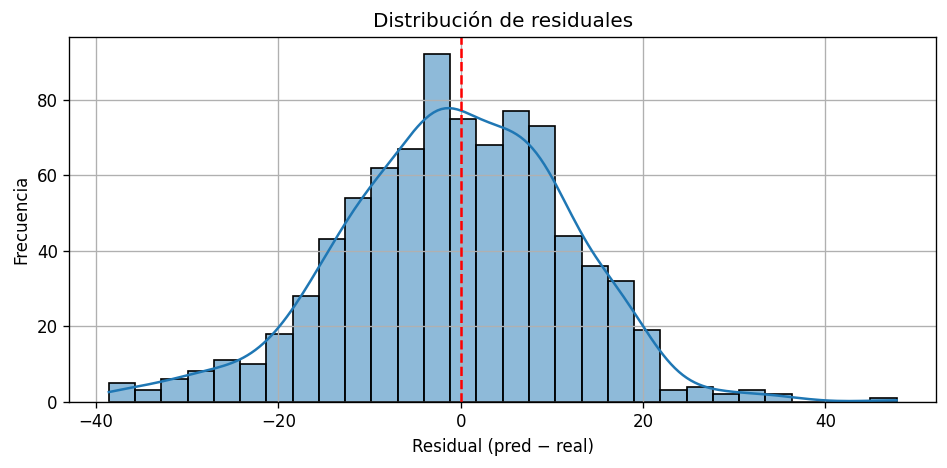

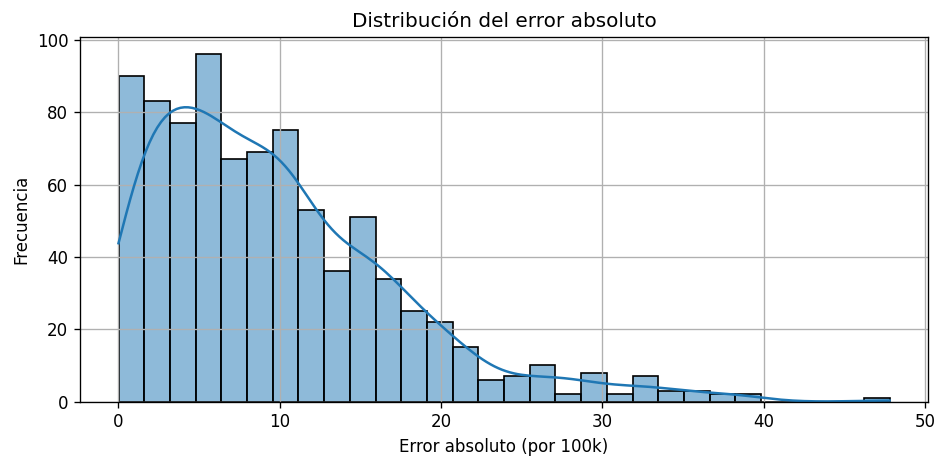

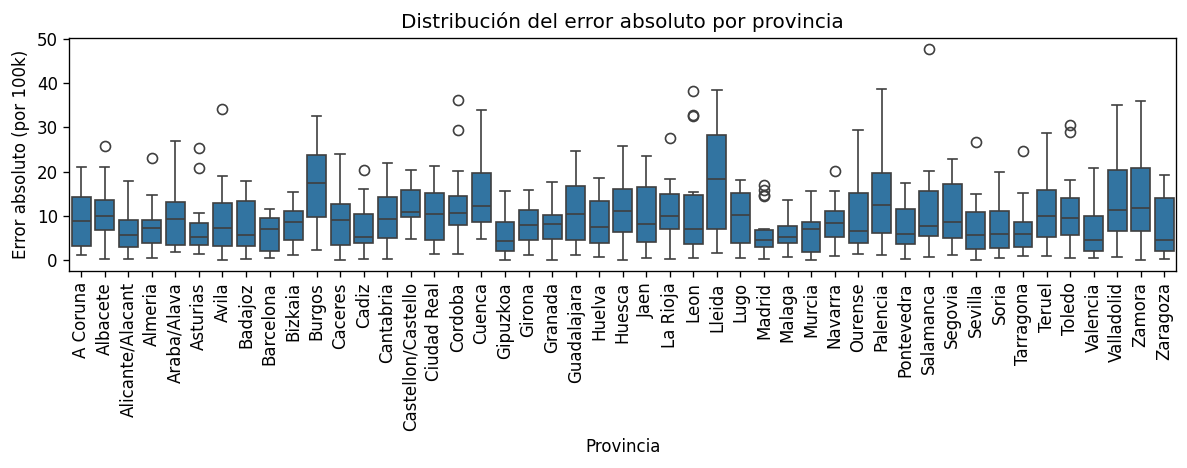

In [ ]:
#===============================================================
# BLOQUE 10b — Visualización del modelo final
# (con mejoras: límites coherentes en scatter, residuales y métricas ponderadas)
# ===============================================================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# ===============================
# 🔢 Predicciones sobre X_seq
# ===============================
X_seq_sc = xscaler.transform(X_seq.reshape(-1, X_seq.shape[2])).reshape(X_seq.shape)
y_pred_t = model_final.predict(X_seq_sc, verbose=0).ravel()
y_pred = yscaler.inverse_transform(y_pred_t.reshape(-1, 1)).ravel()

# ===============================
# 📊 Métricas globales (no ponderadas)
# ===============================
rmse = mean_squared_error(y_vec, y_pred) ** 0.5
mae  = mean_absolute_error(y_vec, y_pred)
r2   = r2_score(y_vec, y_pred)
print(f"\nEvaluación global del modelo final (no ponderada):")
print(f"RMSE: {rmse:.3f} | MAE: {mae:.3f} | R²: {r2:.3f}")

# ✅ Métricas ponderadas por provincia (si procede)
w_eval = None
if 'groups' in globals():
    try:
        if 'WEIGHT_BY_PROVINCE' in globals() and WEIGHT_BY_PROVINCE:
            w_eval = make_province_weights(groups, WEIGHT_POWER)
    except Exception:
        w_eval = None

if w_eval is not None:
    rmse_w = mean_squared_error(y_vec, y_pred, sample_weight=w_eval) ** 0.5
    mae_w  = mean_absolute_error(y_vec, y_pred, sample_weight=w_eval)
    try:
        r2_w = r2_score(y_vec, y_pred, sample_weight=w_eval)
    except TypeError:
        r2_w = np.nan
    print(f"Evaluación ponderada por provincia:")
    print(f"RMSE_w: {rmse_w:.3f} | MAE_w: {mae_w:.3f} | R²_w: {r2_w:.3f}")

# ===============================
# 🌐 Scatter real vs. predicho (límites coherentes)
# ===============================
plt.figure(figsize=(7, 7))
plt.scatter(y_vec, y_pred, alpha=0.3)
lo = float(min(y_vec.min(), y_pred.min()))
hi = float(max(y_vec.max(), y_pred.max()))
plt.plot([lo, hi], [lo, hi], 'r--', label="Ideal")
plt.xlim(lo, hi); plt.ylim(lo, hi)
plt.xlabel("Muertes real (por 100k)")
plt.ylabel("Muertes predicho (por 100k)")
plt.title("Real vs. Predicho Modelo final")
plt.grid(True)
plt.legend()
plt.axis("equal")
plt.tight_layout()
plt.show()

# ===============================
# ♻️ Residuales (pred - real)
# ===============================
res = y_pred - y_vec
plt.figure(figsize=(8, 4))
plt.scatter(y_vec, res, alpha=0.3)
plt.axhline(0.0, color='red', linestyle='--', label='Residual = 0')
plt.xlabel("Muertes real (por 100k)")
plt.ylabel("Residual (pred − real)")
plt.title("Residuals vs Real (Modelo final, in-sample)")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(res, bins=30, kde=True)
plt.axvline(0.0, color='red', linestyle='--')
plt.xlabel("Residual (pred − real)")
plt.ylabel("Frecuencia")
plt.title("Distribución de residuales")
plt.grid(True); plt.tight_layout(); plt.show()

# ===============================
# 📊 Distribución del error absoluto
# ===============================
abs_err = np.abs(y_vec - y_pred)
plt.figure(figsize=(8, 4))
sns.histplot(abs_err, bins=30, kde=True)
plt.xlabel("Error absoluto (por 100k)")
plt.ylabel("Frecuencia")
plt.title("Distribución del error absoluto")
plt.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# 🌍 Error por provincia (opcional)
# ===============================
if 'groups' in globals():
    df_err = pd.DataFrame({"province": groups, "y_true": y_vec, "y_pred": y_pred})
    df_err["abs_err"] = np.abs(df_err["y_true"] - df_err["y_pred"])
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df_err, x="province", y="abs_err")
    plt.xticks(rotation=90)
    plt.xlabel("Provincia"); plt.ylabel("Error absoluto (por 100k)")
    plt.title("Distribución del error absoluto por provincia")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Variable 'groups' no disponible. No se puede hacer boxplot por provincia.")


🖼️ Scatter guardado en: LSTM-OPT-15\plots\final_scatter_promedio_all_provincias.png


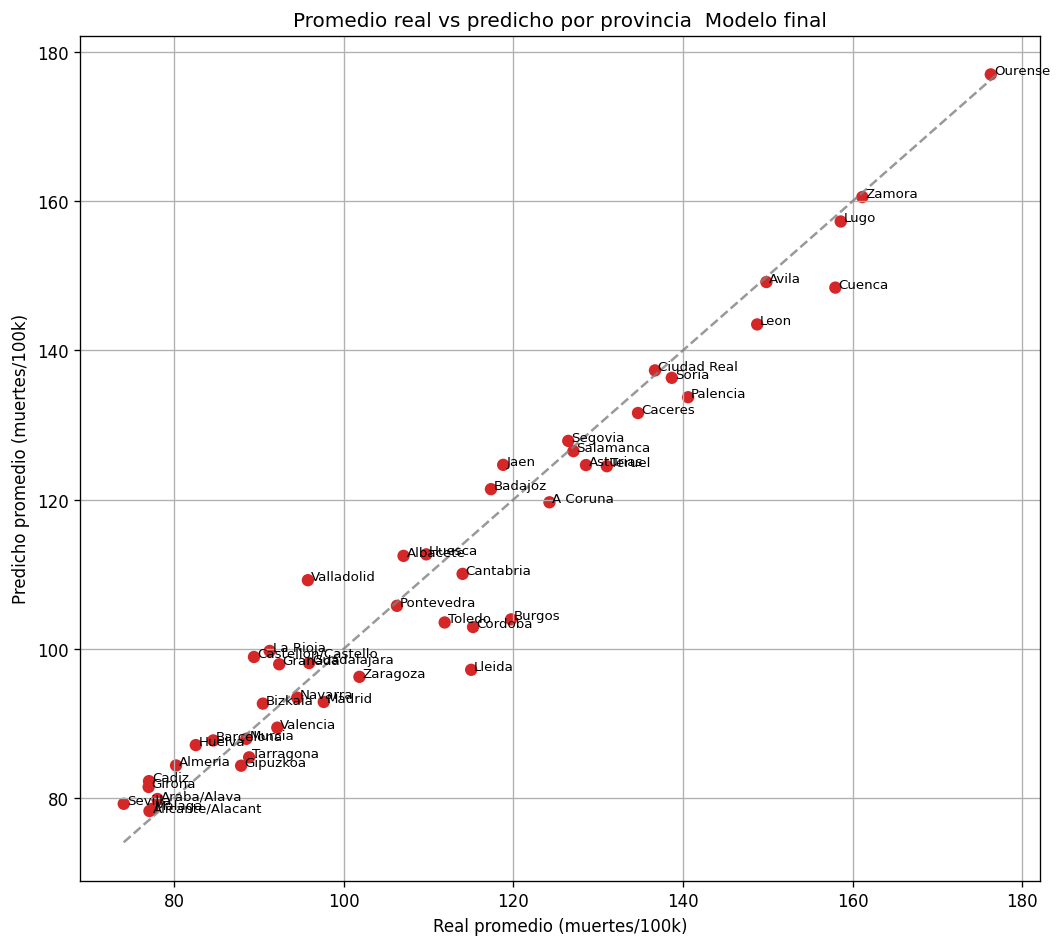

🖼️ Barras guardadas en: LSTM-OPT-15\plots\final_mae_all_provincias.png


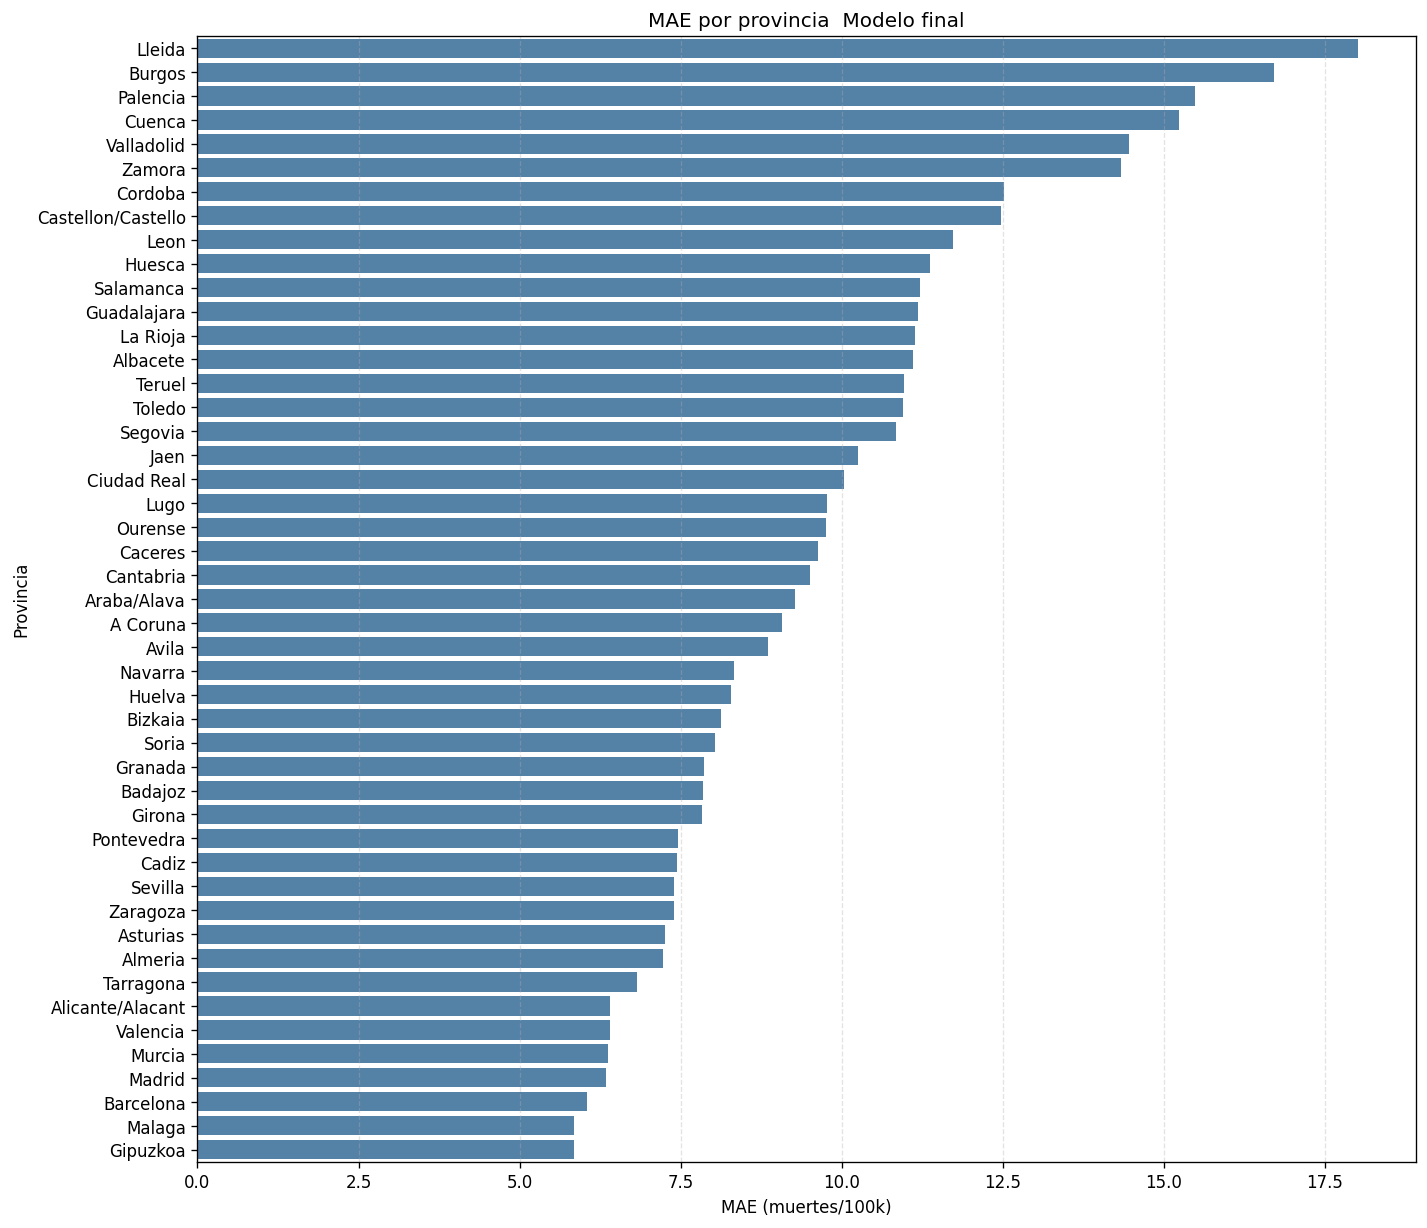

In [ ]:
# ===============================================================
# BLOQUE 10C — TODAS las provincias usadas en el BLOQUE 9 (modelo final)
# Dibuja:
#   1) Dispersión del promedio real vs. predicho por provincia
#   2) Barras de MAE por provincia (todas)
# Usa el modelo final entrenado (model_final) y los mismos escaladores del BLOQUE 9.
# ===============================================================

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# -------- CONFIG --------
SAVE_PNG        = True
OUT_DIR         = os.path.join(MODEL_DIR, "plots")
SCATTER_FNAME   = "final_scatter_promedio_all_provincias.png"
BARS_FNAME      = "final_mae_all_provincias.png"
LABEL_POINTS    = True     # etiqueta todos los puntos en el scatter
ORDER_DESC      = True     # barras ordenadas de peor→mejor (MAE alto a bajo)
POINT_SIZE      = 55
# ------------------------

os.makedirs(OUT_DIR, exist_ok=True)

# ------------------------------
# 1) Predicciones del modelo final sobre TODO X_seq (como en 10b)
# ------------------------------
# Reutiliza y_pred si ya existe; si no, lo calcula.
if 'y_pred' not in globals():
    X_seq_sc = xscaler.transform(X_seq.reshape(-1, X_seq.shape[2])).reshape(X_seq.shape)
    y_pred_t = model_final.predict(X_seq_sc, verbose=0).ravel()
    y_pred = yscaler.inverse_transform(y_pred_t.reshape(-1, 1)).ravel()

# Comprobaciones mínimas
if 'groups' not in globals():
    raise RuntimeError("No encuentro 'groups'. Es necesario para saber qué provincias se usaron en el BLOQUE 9.")

# ------------------------------
# 2) Resumen por provincia (TODAS las provincias de BLOQUE 9)
# ------------------------------
df_all = pd.DataFrame({
    "provincia": pd.Series(groups, dtype=str),
    "y_real":    y_vec,
    "y_pred":    y_pred
})
df_all["abs_error"] = np.abs(df_all["y_real"] - df_all["y_pred"])
df_all["sq_error"]  = (df_all["y_real"] - df_all["y_pred"])**2

df_summary = (df_all.groupby("provincia", as_index=False)
              .agg(real_avg=("y_real","mean"),
                   pred_avg=("y_pred","mean"),
                   mae=("abs_error","mean"),
                   rmse=("sq_error", lambda s: float(np.sqrt(np.mean(s)))),
                   n=("y_real","count")))

# ------------------------------
# 3) Dispersión: promedio real vs predicho (TODAS)
# ------------------------------
plt.figure(figsize=(9, 8))
ax = sns.scatterplot(data=df_summary, x="real_avg", y="pred_avg",
                     s=POINT_SIZE, color="#d62728", edgecolor="none")
lo = min(df_summary["real_avg"].min(), df_summary["pred_avg"].min())
hi = max(df_summary["real_avg"].max(), df_summary["pred_avg"].max())
plt.plot([lo, hi], [lo, hi], "--", color="gray", alpha=0.8)
plt.xlabel("Real promedio (muertes/100k)")
plt.ylabel("Predicho promedio (muertes/100k)")
plt.title("Promedio real vs predicho por provincia  Modelo final")
plt.grid(True)

if LABEL_POINTS:
    for _, r in df_summary.iterrows():
        ax.text(r["real_avg"]+0.35, r["pred_avg"], r["provincia"], fontsize=8)

plt.tight_layout()
if SAVE_PNG:
    out = os.path.join(OUT_DIR, SCATTER_FNAME)
    plt.savefig(out, dpi=150, bbox_inches="tight")
    print("🖼️ Scatter guardado en:", out)
plt.show()

# ------------------------------
# 4) Barras de MAE por provincia (TODAS)
# ------------------------------
df_plot = df_summary.sort_values("mae", ascending=not ORDER_DESC)
height = max(6, 0.22 * len(df_plot))  # altura dinámica
plt.figure(figsize=(12, height))
sns.barplot(data=df_plot, y="provincia", x="mae", color="steelblue")
plt.xlabel("MAE (muertes/100k)")
plt.ylabel("Provincia")
plt.title("MAE por provincia  Modelo final")
plt.grid(True, axis="x", linestyle="--", alpha=0.35)
plt.tight_layout()
if SAVE_PNG:
    out = os.path.join(OUT_DIR, BARS_FNAME)
    plt.savefig(out, dpi=150, bbox_inches="tight")
    print("🖼️ Barras guardadas en:", out)
plt.show()



🔎 Métricas globales
RMSE: 12.333 | MAE: 9.711 | R²: 0.835

Métricas por provincia:


,province,RMSE,MAE,R2
30,Malaga,6.778695,5.847232,0.360351
8,Barcelona,7.141166,6.049625,0.263601
18,Gipuzkoa,7.512240,5.846718,0.558779
31,Murcia,7.823830,6.368093,0.489294
2,Alicante/Alacant,7.885159,6.407194,0.585375
29,Madrid,8.225136,6.342233,0.071128
43,Valencia,8.473872,6.399351,0.283791
40,Tarragona,8.866490,6.824326,0.360277
3,Almeria,8.955319,7.222410,-0.076679
19,Girona,8.978256,7.836159,0.148470


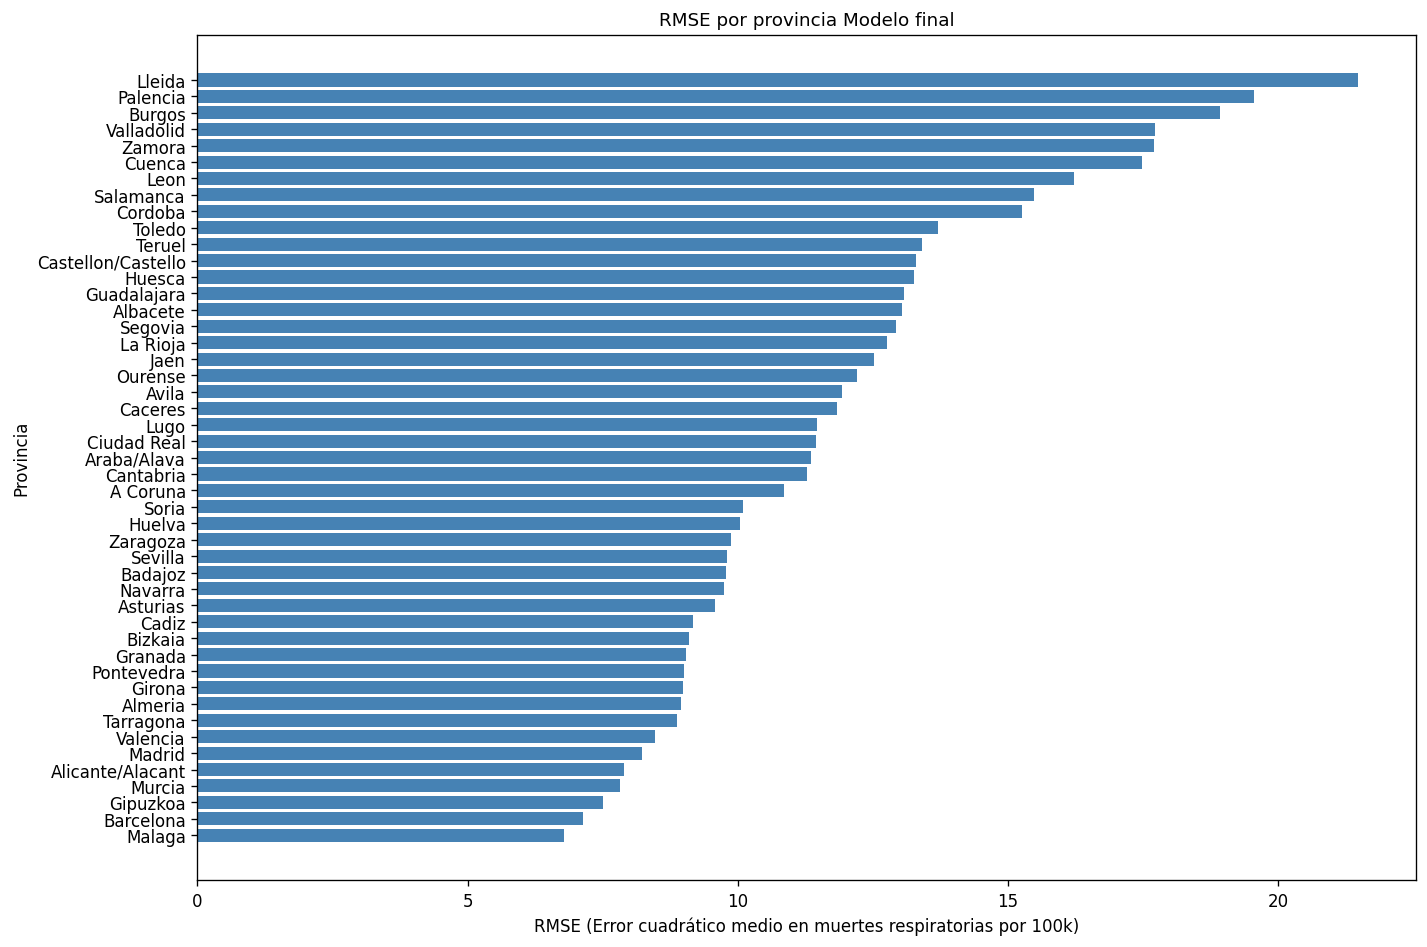


Métricas por año:


,year,RMSE,MAE,R2
0,2004,12.110623,9.621564,0.769923
1,2005,18.404301,15.744174,0.497773
2,2006,12.593580,10.519009,0.725077
3,2007,9.811173,8.331231,0.856488
4,2008,8.764087,7.058444,0.877435
5,2009,8.550053,6.977243,0.882785
6,2010,9.429805,7.914691,0.856189
7,2011,9.032180,6.919749,0.856663
8,2012,16.219193,12.334451,0.660908
9,2013,10.389848,8.412399,0.830244


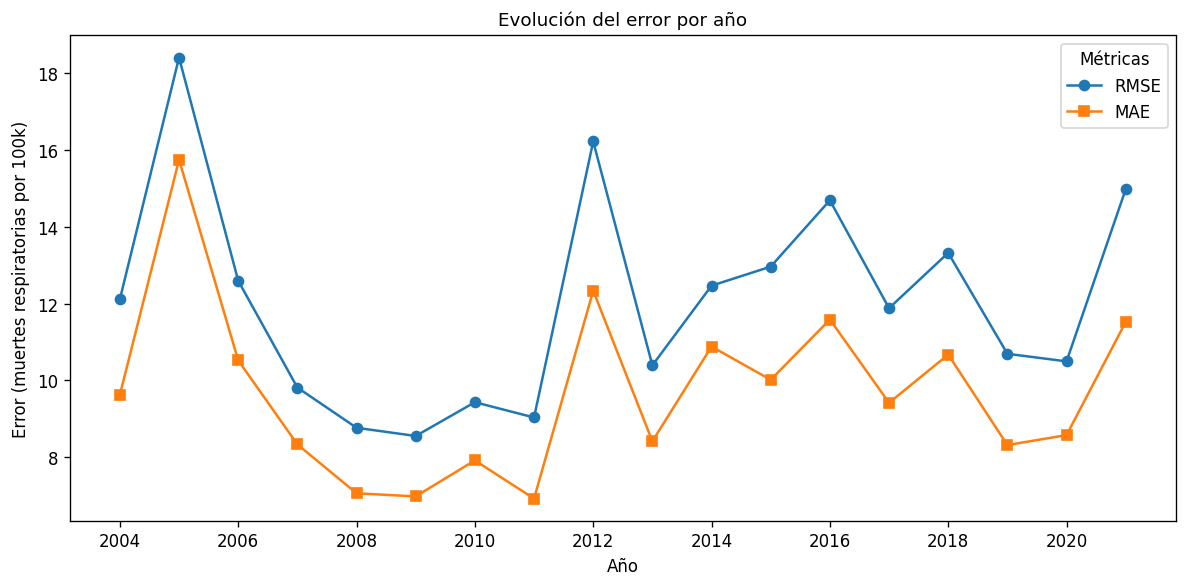

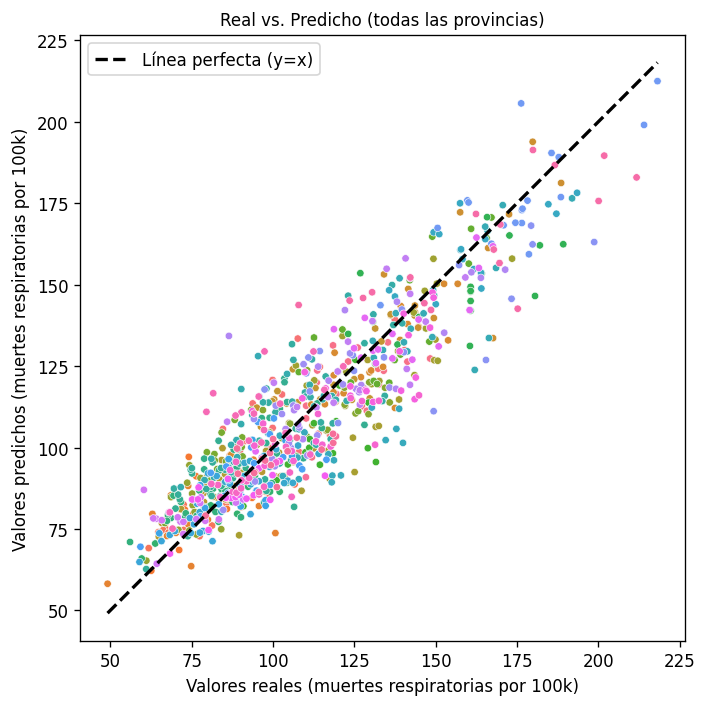

In [ ]:
# ===============================================================
# BLOQUE 10D — Métricas detalladas (global, por provincia y año)
#              + reconstrucción de prov/year + opción de pesos
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


# seaborn es opcional para plots bonitos
try:
    import seaborn as sns
    _HAS_SNS = True
except Exception:
    _HAS_SNS = False

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------
# ⚙️ CONFIG (ajusta si hace falta)
# -------------------------
SRC_DF    = df_pa        # panel con columnas province/year usado en BLOQUE 2
COL_PROV  = "province"
COL_YEAR  = "year"

# Pesos por provincia (opcional)
USAR_PESOS    = False        # ⬅️ pon True si quieres métricas ponderadas
PESO_MODO     = "inv_n"      # "inv_n" (cada provincia pesa igual) | "custom"
PESOS_PROV    = {}           # dict opcional: {"Madrid": 2.0, "Soria": 0.5, ...}

# Deben existir en el entorno: LOOKBACK_L, HORIZON_H, y_vec (real, desescalado), y_pred (desescalado)
# ---------------------------------------------------------------

# === Helpers de compatibilidad y métricas ===
def rmse_safe(y_true, y_pred):
    """RMSE compatible con todas las versiones de sklearn."""
    try:
        return mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        return np.sqrt(mean_squared_error(y_true, y_pred))

def mae_weighted(y_true, y_pred, w=None):
    if w is None:
        return mean_absolute_error(y_true, y_pred)
    w = np.asarray(w, dtype=float)
    e = np.abs(np.asarray(y_true) - np.asarray(y_pred))
    return np.average(e, weights=w)

def rmse_weighted(y_true, y_pred, w=None):
    if w is None:
        return rmse_safe(y_true, y_pred)
    w = np.asarray(w, dtype=float)
    se = (np.asarray(y_true) - np.asarray(y_pred))**2
    return np.sqrt(np.average(se, weights=w))

def r2_weighted_safe(y_true, y_pred, w=None):
    """R² ponderado (compatibilidad). Si no hay pesos, usa sklearn."""
    if w is None:
        return r2_score(y_true, y_pred)
    w = np.asarray(w, dtype=float)
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    # Definición de R² ponderado: 1 - SS_res / SS_tot, con medias ponderadas
    y_bar = np.average(y_true, weights=w)
    ss_res = np.sum(w * (y_true - y_pred)**2)
    ss_tot = np.sum(w * (y_true - y_bar)**2)
    return 1.0 - (ss_res / ss_tot if ss_tot > 0 else np.nan)

# === Reconstrucción de prov_seq / year_seq SIN tocar BLOQUE 2 ===
def rebuild_meta_sequences(panel_df, lookback, horizon, col_prov=COL_PROV, col_year=COL_YEAR):
    """Devuelve arrays prov_seq, year_seq alineados con y_vec/y_pred."""
    prov_seq, year_seq = [], []
    panel_df = panel_df.sort_values([col_prov, col_year]).reset_index(drop=True)
    for prov, g in panel_df.groupby(col_prov, sort=True):
        g = g.sort_values(col_year)
        n = len(g)
        max_i = n - lookback - horizon + 1
        if max_i <= 0:
            continue
        for i in range(max_i):
            label_idx = i + lookback + horizon - 1
            prov_seq.append(prov)
            year_seq.append(int(g.iloc[label_idx][col_year]))
    return np.asarray(prov_seq), np.asarray(year_seq)

prov_seq, year_seq = rebuild_meta_sequences(SRC_DF, LOOKBACK_L, HORIZON_H, COL_PROV, COL_YEAR)

# Alineación segura con y_vec / y_pred
min_len = min(len(prov_seq), len(y_vec), len(y_pred))
if len(prov_seq) != len(y_vec) or len(y_vec) != len(y_pred):
    print(f"⚠️ Alineación: recortando al mínimo común ({min_len}). "
          f"prov_seq={len(prov_seq)}, y_vec={len(y_vec)}, y_pred={len(y_pred)}")
prov_seq = prov_seq[:min_len]
year_seq = year_seq[:min_len]
y_true   = np.asarray(y_vec)[:min_len]
y_hat    = np.asarray(y_pred)[:min_len]

# Construir DF de evaluación
df_eval = pd.DataFrame({
    COL_PROV: prov_seq,
    COL_YEAR: year_seq,
    "real":   y_true,
    "pred":   y_hat
})

# === Pesos por muestra (si procede) ===
sample_w = None
if USAR_PESOS:
    if PESO_MODO == "inv_n":
        # Cada provincia contribuye igual: peso_i = 1 / n_provincia
        n_por_prov = df_eval.groupby(COL_PROV).size().to_dict()
        sample_w = df_eval[COL_PROV].map(lambda p: 1.0 / n_por_prov[p]).to_numpy(dtype=float)
        # Normaliza para que sumen N (opcional; no cambia RMSE/MAE ponderados por media)
        sample_w = sample_w * (len(sample_w) / sample_w.sum())
    elif PESO_MODO == "custom" and PESOS_PROV:
        # Pesos directos por provincia
        sample_w = df_eval[COL_PROV].map(lambda p: PESOS_PROV.get(p, 1.0)).to_numpy(dtype=float)
    else:
        print("⚠️ USAR_PESOS=True pero no se reconoce PESO_MODO; se calculará sin pesos.")
        sample_w = None

# -------------------------
# 1) Métricas globales
# -------------------------
rmse_g = rmse_weighted(df_eval["real"], df_eval["pred"], sample_w)
mae_g  = mae_weighted(df_eval["real"], df_eval["pred"], sample_w)
r2_g   = r2_weighted_safe(df_eval["real"], df_eval["pred"], sample_w)
print("\n🔎 Métricas globales" + (" (ponderadas)" if USAR_PESOS and sample_w is not None else ""))
print(f"RMSE: {rmse_g:.3f} | MAE: {mae_g:.3f} | R²: {r2_g:.3f}")

# -------------------------
# 2) Métricas por provincia
# -------------------------
def _metrics_group(g):
    # Si hay pesos, extrae los de ese grupo
    w = None
    if sample_w is not None:
        w = sample_w[g.index]
    return pd.Series({
        "RMSE": rmse_weighted(g["real"].to_numpy(), g["pred"].to_numpy(), w),
        "MAE":  mae_weighted(g["real"].to_numpy(), g["pred"].to_numpy(), w),
        "R2":   r2_weighted_safe(g["real"].to_numpy(), g["pred"].to_numpy(), w if len(g) > 1 else None)
    })

prov_metrics = df_eval.groupby(COL_PROV, sort=True).apply(_metrics_group).reset_index()

print("\nMétricas por provincia:")
try:
    display(prov_metrics.sort_values("RMSE"))
except Exception:
    print(prov_metrics.sort_values("RMSE"))

# Plot RMSE por provincia
plt.figure(figsize=(12, 8))
orden = prov_metrics.sort_values("RMSE", ascending=True)
plt.barh(orden[COL_PROV], orden["RMSE"], color="steelblue")

plt.title("RMSE por provincia Modelo final", fontsize=11)
plt.xlabel("RMSE (Error cuadrático medio en muertes respiratorias por 100k)")
plt.ylabel("Provincia")
plt.tight_layout()
plt.show()


# -------------------------
# 3) Métricas por año
# -------------------------
def _metrics_group_year(g):
    w = None
    if sample_w is not None:
        w = sample_w[g.index]
    return pd.Series({
        "RMSE": rmse_weighted(g["real"].to_numpy(), g["pred"].to_numpy(), w),
        "MAE":  mae_weighted(g["real"].to_numpy(), g["pred"].to_numpy(), w),
        "R2":   r2_weighted_safe(g["real"].to_numpy(), g["pred"].to_numpy(), w if len(g) > 1 else None)
    })

year_metrics = df_eval.groupby(COL_YEAR, sort=True).apply(_metrics_group_year).reset_index()

print("\nMétricas por año:")
try:
    display(year_metrics.sort_values(COL_YEAR))
except Exception:
    print(year_metrics.sort_values(COL_YEAR))

# Plot evolución de errores por año
plt.figure(figsize=(10, 5))
plt.plot(year_metrics[COL_YEAR], year_metrics["RMSE"], marker="o", label="RMSE")
plt.plot(year_metrics[COL_YEAR], year_metrics["MAE"],  marker="s", label="MAE")
plt.title("Evolución del error por año", fontsize=11)
plt.xlabel("Año")
plt.ylabel("Error (muertes respiratorias por 100k)")
plt.legend(title="Métricas", loc="upper right")
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.tight_layout()
plt.show()

# -------------------------
# 4) Scatter global Real vs Predicho
# -------------------------
plt.figure(figsize=(6, 6))
if _HAS_SNS:
    sns.scatterplot(x=df_eval["real"], y=df_eval["pred"], hue=df_eval[COL_PROV], legend=False, s=20)
else:
    plt.scatter(df_eval["real"], df_eval["pred"], s=12, alpha=0.7)

mn, mx = df_eval["real"].min(), df_eval["real"].max()
plt.plot([mn, mx], [mn, mx], "k--", lw=2, label="Línea perfecta (y=x)")

plt.title("Real vs. Predicho (todas las provincias)", fontsize=10)
plt.xlabel("Valores reales (muertes respiratorias por 100k)")
plt.ylabel("Valores predichos (muertes respiratorias por 100k)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


# Bloque 11 Importancia de las variables

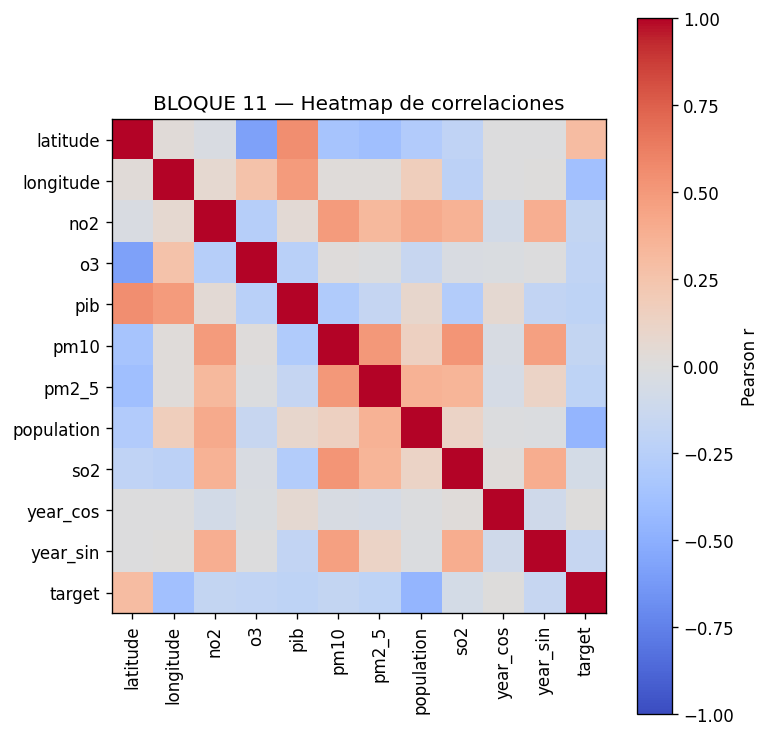

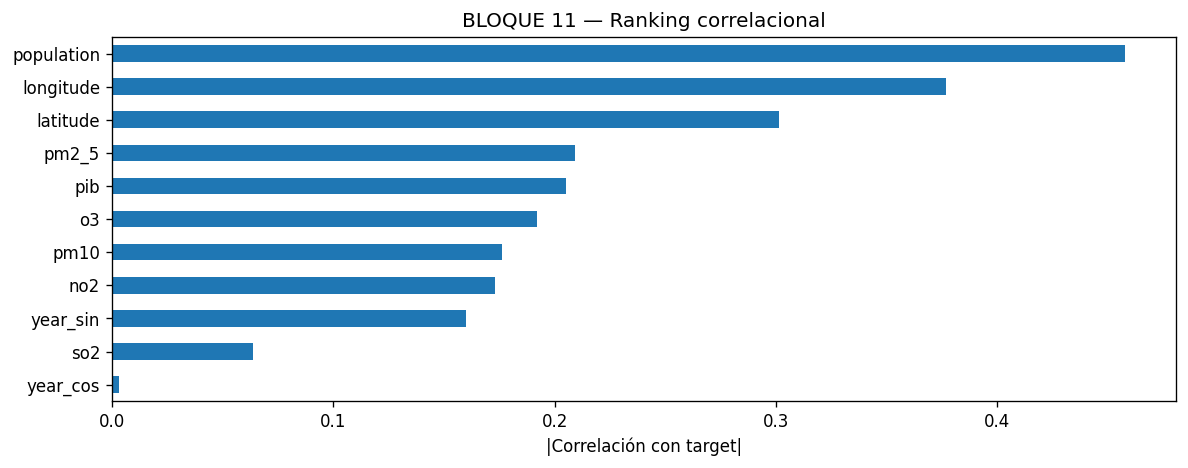

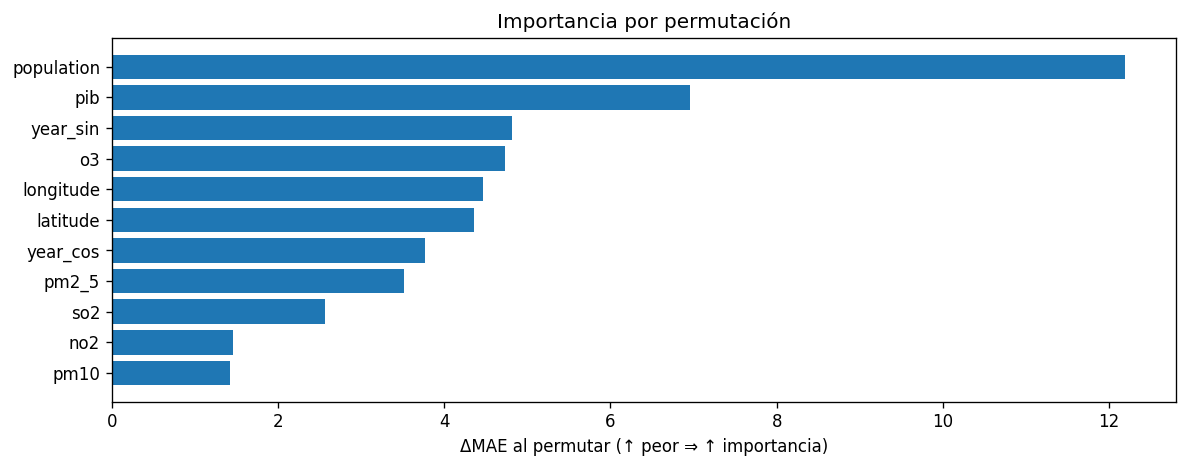

✅ BLOQUE 11 listo. MAE base: 9.711


In [ ]:
# ===============================================================
# BLOQUE 11 — Influencia de variables del modelo final
#   (A: Correlaciones Pearson + B: Permutation Importance)
# ===============================================================

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# -----------------------
# ⚙️ CONFIG
# -----------------------
OUT_DIR  = os.path.join(MODEL_DIR, "plots")
SAVE_PNG = True
SEED     = 42
rng      = np.random.default_rng(SEED)
os.makedirs(OUT_DIR, exist_ok=True)

# ===============================================================
# 🔁 Función auxiliar: predecir con escalado y desescalado correcto
# ===============================================================
def predict_model(X_seq):
    X_sc = xscaler.transform(X_seq.reshape(-1, X_seq.shape[2])).reshape(X_seq.shape)
    y_pred_t = model_final.predict(X_sc, verbose=0).ravel()
    return yscaler.inverse_transform(y_pred_t.reshape(-1,1)).ravel()

# ===============================================================
# A) Correlaciones Pearson (último timestep de cada secuencia)
# ===============================================================
X_last = X_seq[:, -1, :]   # último año en cada ventana
df_corr = pd.DataFrame(X_last, columns=features)
df_corr["target"] = y_vec

corr = df_corr.corr(numeric_only=True)

plt.figure(figsize=(1.0+0.5*len(features), 1.0+0.5*len(features)))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Pearson r")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)),  corr.index)
plt.title("BLOQUE 11 — Heatmap de correlaciones")
plt.tight_layout()
if SAVE_PNG:
    plt.savefig(os.path.join(OUT_DIR, "B11_corr_heatmap.png"), dpi=150)
plt.show()

corr_target = corr["target"].drop("target").abs().sort_values(ascending=False)
plt.figure(figsize=(10, max(4, 0.35*len(corr_target))))
corr_target.plot(kind="barh")
plt.gca().invert_yaxis()
plt.xlabel("|Correlación con target|")
plt.title("BLOQUE 11 — Ranking correlacional")
plt.tight_layout()
if SAVE_PNG:
    plt.savefig(os.path.join(OUT_DIR, "B11_corr_ranking.png"), dpi=150)
plt.show()

# ===============================================================
# B) Importancia por Permutación (LSTM final)
# ===============================================================
y_pred_base = predict_model(X_seq)
mae_base    = mean_absolute_error(y_vec, y_pred_base)

importancias = []
n, T, F = X_seq.shape
for k, fname in enumerate(features):
    X_perm = X_seq.copy()
    idx = rng.permutation(n)
    X_perm[:, :, k] = X_perm[idx, :, k]   # permutación coherente en todos los timesteps
    y_pred_perm = predict_model(X_perm)
    mae_perm    = mean_absolute_error(y_vec, y_pred_perm)
    delta_mae   = mae_perm - mae_base
    importancias.append((fname, float(delta_mae)))

imp_df = pd.DataFrame(importancias, columns=["feature", "delta_MAE"]).sort_values("delta_MAE", ascending=True)

plt.figure(figsize=(10, max(4, 0.35*len(imp_df))))
plt.barh(imp_df["feature"], imp_df["delta_MAE"])
plt.xlabel("ΔMAE al permutar (↑ peor ⇒ ↑ importancia)")
plt.title("Importancia por permutación")
plt.tight_layout()
if SAVE_PNG:
    plt.savefig(os.path.join(OUT_DIR, "B11_permutation_importance.png"), dpi=150)
plt.show()

# Guardar resultados
imp_df.to_csv(os.path.join(OUT_DIR, "B11_permutation_importance.csv"), index=False)
corr.to_csv(os.path.join(OUT_DIR, "B11_correlations.csv"))

print(f"✅ BLOQUE 11 listo. MAE base: {mae_base:.3f}")


# Bloque 12 Importancia de las variables

[B12] MAE base: 9.7112


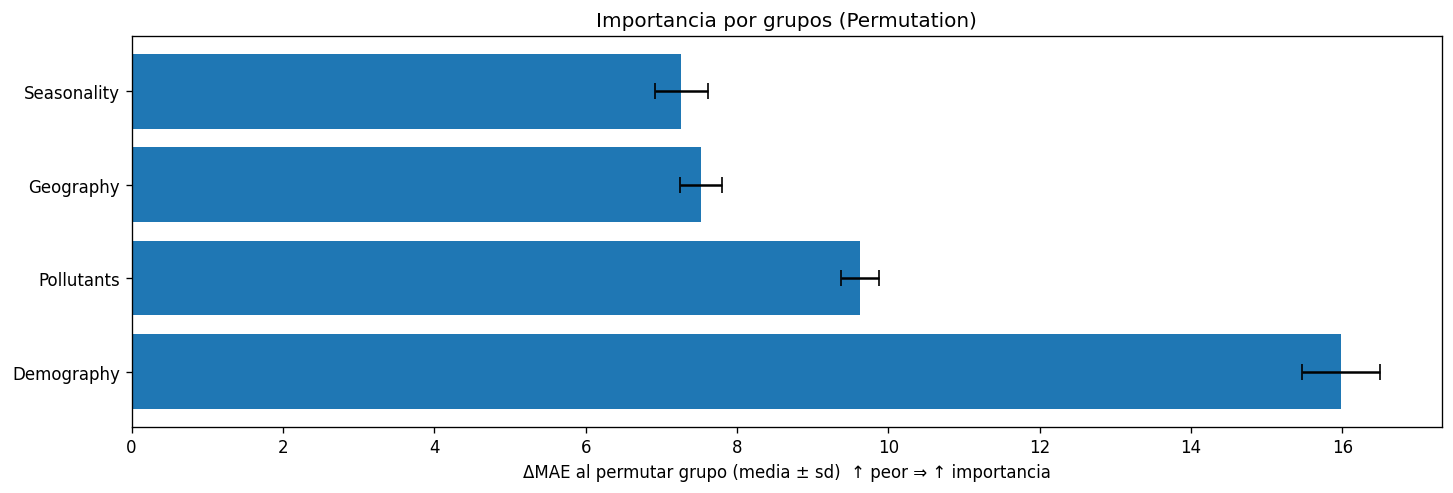

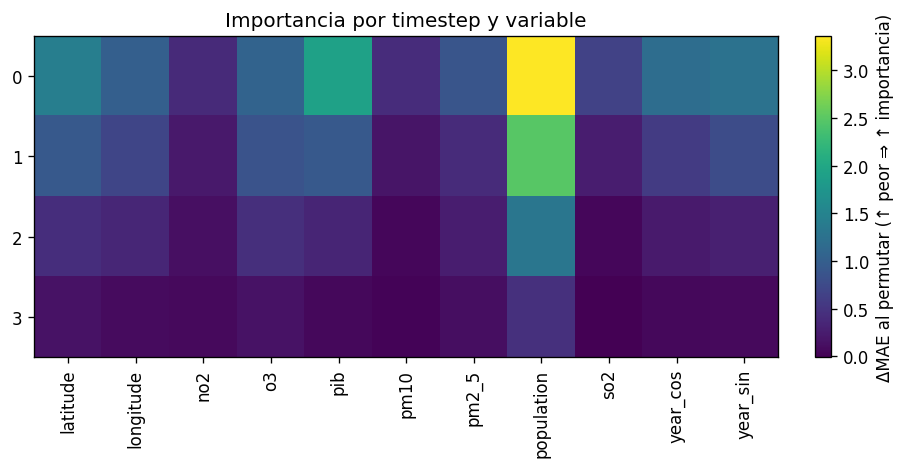

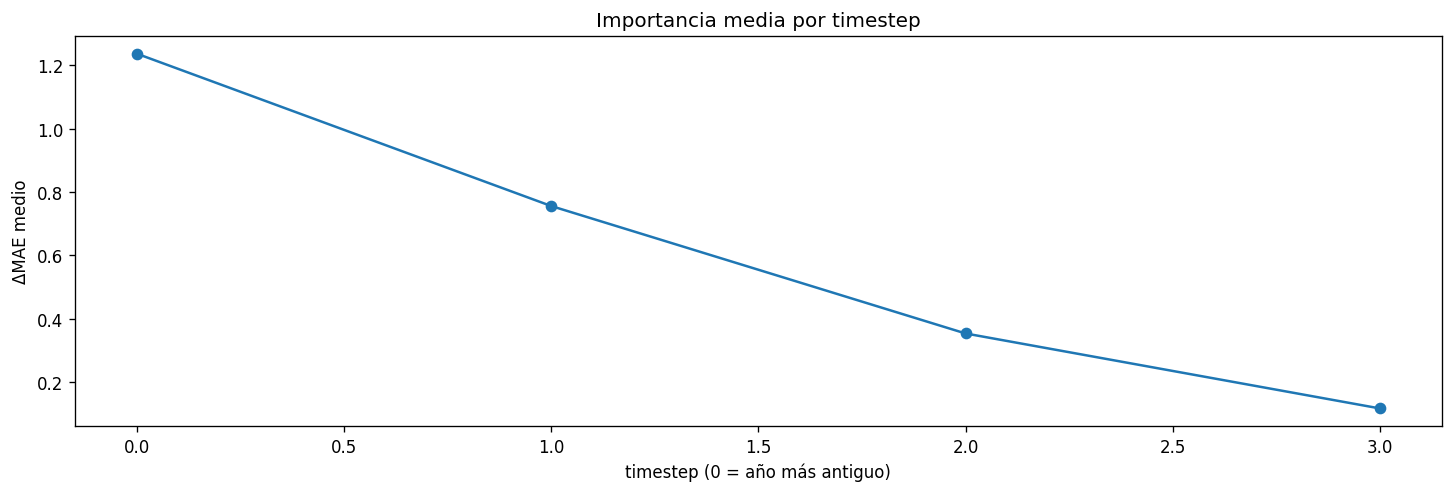

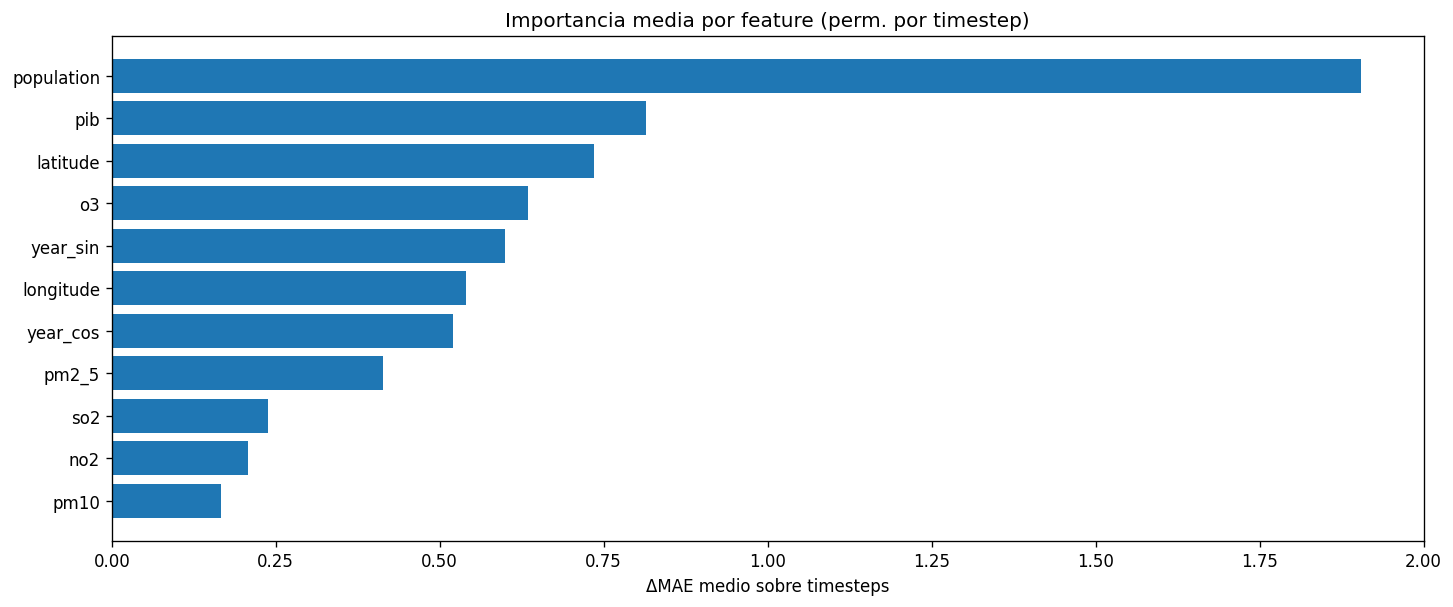

✅ BLOQUE 12 listo.
   - Guardado: B12_group_permutation_importance(.csv/.png)
   - Guardado: B12_timestep_feature_permutation.csv + heatmap/agrupados


In [ ]:
# ===============================================================
# BLOQUE 12 — Permutaciones avanzadas (mejorado):
#   (1) Importancia por GRUPOS de variables
#   (2) Importancia por TIMESTEP (t) y por variable (k)
# ===============================================================

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# -----------------------
# ⚙️ CONFIG
# -----------------------
MODEL_DIR    = "LSTM-OPT-15"   # carpeta base donde se guardan los plots
OUT_DIR      = os.path.join(MODEL_DIR, "plots")
SAVE_PNG     = True
SEED         = 42
N_REPEATS    = 10          # repeticiones para promediar ruido
SHOW_TOP     = None        # si quieres limitar nº de barras en los plots, pon un entero
TIMESTEPS    = None        # None = todos; o una lista/array de índices t a evaluar (0..T-1)

# Grupos sugeridos (ajústalos a tus nombres reales). Se usa la intersección con `features`.
GROUPS = {
    "Pollutants":  ["no2", "pm10", "pm2_5", "o3", "so2"],
    "Geography":   ["latitude", "longitude"],
    "Demography":  ["population", "pib"],
    "Seasonality": ["year_sin", "year_cos"],
    # "Meteo": ["temp","wind","humidity"],
}

# Opcionales de estética global (puedes comentar si no los quieres)
plt.rcParams["figure.dpi"] = 120
plt.rcParams["savefig.bbox"] = "tight"

# -----------------------
rng = np.random.default_rng(SEED)
os.makedirs(OUT_DIR, exist_ok=True)

# 🔧 helper para guardar/mostrar con buen espaciado y cerrar figura
def save_show(fig, filename):
    if SAVE_PNG:
        fig.savefig(os.path.join(OUT_DIR, filename), dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)

# ===============================================================
# 🔁 Auxiliar: predecir con el escalado correcto
# ===============================================================
def predict_model(X_seq):
    X_sc = xscaler.transform(X_seq.reshape(-1, X_seq.shape[2])).reshape(X_seq.shape)
    y_pred_t = model_final.predict(X_sc, verbose=0).ravel()
    return yscaler.inverse_transform(y_pred_t.reshape(-1,1)).ravel()

# ===============================================================
# 📏 Métrica base del modelo
# ===============================================================
y_pred_base = predict_model(X_seq)
mae_base    = mean_absolute_error(y_vec, y_pred_base)
print(f"[B12] MAE base: {mae_base:.4f}")

# ===============================================================
# (1) Importancia por GRUPOS de variables
#   - Permuta simultáneamente todas las features del grupo
#   - Misma permutación para todos los timesteps (coherencia temporal)
#   - Repite N_REPEATS y promedia (con desviación estándar)
# ===============================================================
n, T, F = X_seq.shape
name_to_idx = {f: i for i, f in enumerate(features)}

# Intersección grupo-features reales; añade grupo "Other" automáticamente
resolved_groups = {}
already = set()
for gname, gvars in GROUPS.items():
    idxs = [name_to_idx[v] for v in gvars if v in name_to_idx]
    if idxs:
        resolved_groups[gname] = idxs
        already.update(idxs)

rest_idxs = [i for i in range(F) if i not in already]
if rest_idxs:
    resolved_groups["Other"] = rest_idxs

group_rows = []
for gname, idxs in resolved_groups.items():
    deltas = []
    for rep in range(N_REPEATS):
        Xp = X_seq.copy()
        idx = rng.permutation(n)
        # misma permutación para TODAS las features del grupo y en TODOS los timesteps
        Xp[:, :, idxs] = Xp[idx, :, :][:, :, idxs]
        yp = predict_model(Xp)
        mae_p = mean_absolute_error(y_vec, yp)
        deltas.append(mae_p - mae_base)
    group_rows.append({
        "group": gname,
        "features_in_group": len(idxs),
        "delta_MAE_mean": float(np.mean(deltas)),
        "delta_MAE_std":  float(np.std(deltas, ddof=1))
    })

group_imp = pd.DataFrame(group_rows).sort_values("delta_MAE_mean", ascending=True)
group_imp.to_csv(os.path.join(OUT_DIR, "B12_group_permutation_importance.csv"), index=False)

# Plot grupos (más aire y cierre de figura)
fig, ax = plt.subplots(
    figsize=(12, max(4, 0.55*len(group_imp))),
    constrained_layout=True
)
x = group_imp["delta_MAE_mean"].values
e = group_imp["delta_MAE_std"].values
y = group_imp["group"].values
if SHOW_TOP:
    x, e, y = x[:SHOW_TOP], e[:SHOW_TOP], y[:SHOW_TOP]
ax.barh(y, x, xerr=e, capsize=5)
ax.set_xlabel("ΔMAE al permutar grupo (media ± sd)  ↑ peor ⇒ ↑ importancia")
ax.set_title("Importancia por grupos (Permutation)")
ax.invert_yaxis()
save_show(fig, "B12_group_permutation_importance.png")

# ===============================================================
# (2) Importancia por TIMESTEP y FEATURE
#   - Permuta SOLO X[:, t, k] manteniendo el resto intacto
#   - Repite N_REPEATS y promedia
#   - Devuelve matriz ΔMAE de tamaño (T, F)
# ===============================================================
t_list = list(range(T)) if TIMESTEPS is None else list(TIMESTEPS)

delta_mat = np.zeros((T, F), dtype=np.float32)  # acumulador de medias
for k in range(F):
    for ti, t in enumerate(t_list):
        deltas = []
        for rep in range(N_REPEATS):
            Xp = X_seq.copy()
            idx = rng.permutation(n)
            # solo permuta la "columna" (timestep t, feature k)
            Xp[:, t, k] = Xp[idx, t, k]
            yp = predict_model(Xp)
            mae_p = mean_absolute_error(y_vec, yp)
            deltas.append(mae_p - mae_base)
        delta_mat[t, k] = np.mean(deltas)

# Guardar resultados detallados (larga pero útil)
timesteps = np.arange(T)
df_heat = pd.DataFrame(delta_mat, index=timesteps, columns=features)
df_heat.to_csv(os.path.join(OUT_DIR, "B12_timestep_feature_permutation.csv"))

# --- Heatmap (t x features) con espaciamiento mejorado
fig, ax = plt.subplots(
    figsize=(1.4 + 0.55*F, 2.0 + 0.45*len(t_list)),
    constrained_layout=True
)
im = ax.imshow(delta_mat, aspect="auto")
cb = fig.colorbar(im, ax=ax)
cb.set_label("ΔMAE al permutar (↑ peor ⇒ ↑ importancia)")
ax.set_yticks(range(T))
ax.set_xticks(range(F))
ax.set_xticklabels(features, rotation=90)
ax.set_title("Importancia por timestep y variable")
save_show(fig, "B12_timestep_feature_heatmap.png")

# --- Agregados útiles
# Importancia media por timestep (promediando features)
t_imp = df_heat.mean(axis=1).to_frame("delta_MAE_mean")
t_imp.index.name = "timestep"
t_imp.to_csv(os.path.join(OUT_DIR, "B12_timestep_mean_importance.csv"))

fig, ax = plt.subplots(figsize=(12, 4), constrained_layout=True)
ax.plot(t_imp.index, t_imp["delta_MAE_mean"], marker="o")
ax.set_xlabel("timestep (0 = año más antiguo)")
ax.set_ylabel("ΔMAE medio")
ax.set_title("Importancia media por timestep")
save_show(fig, "B12_timestep_mean_importance.png")

# Importancia media por feature (promediando timesteps)
f_imp = df_heat.mean(axis=0).sort_values(ascending=False).to_frame("delta_MAE_mean")
f_imp.index.name = "feature"
f_imp.to_csv(os.path.join(OUT_DIR, "B12_feature_mean_importance_over_timesteps.csv"))

fig, ax = plt.subplots(
    figsize=(12, max(4, 0.45*len(f_imp))),
    constrained_layout=True
)
vals = f_imp["delta_MAE_mean"].values
labs = f_imp.index.values
if SHOW_TOP:
    vals, labs = vals[:SHOW_TOP], labs[:SHOW_TOP]
ax.barh(labs, vals)
ax.invert_yaxis()
ax.set_xlabel("ΔMAE medio sobre timesteps")
ax.set_title("Importancia media por feature (perm. por timestep)")
save_show(fig, "B12_feature_mean_importance_over_timesteps.png")

print("✅ BLOQUE 12 listo.")
print("   - Guardado: B12_group_permutation_importance(.csv/.png)")
print("   - Guardado: B12_timestep_feature_permutation.csv + heatmap/agrupados")


In [ ]:
df_pa

,province,year,no2,o3,pm10,pm2_5,so2,latitude,longitude,respiratory_deaths_per_100k,pib,population,year_sin,year_cos
0,Burgos,2000,32.210667,57.433250,36.922500,8.511000,10.179000,42.197522,-3.513311,116.06,17.824,347240.0,0.000000e+00,1.000000
1,Burgos,2001,29.579000,57.433250,36.245000,8.511000,7.453750,42.280280,-3.382660,108.63,18.608,349810.0,2.947552e-01,0.955573
2,Burgos,2002,38.371000,57.433250,40.095667,8.511000,7.413000,42.209430,-3.538260,115.96,19.557,352723.0,5.633201e-01,0.826239
3,Burgos,2003,32.819000,57.433250,38.563750,8.511000,7.550000,42.319038,-3.395008,128.94,20.855,355205.0,7.818315e-01,0.623490
4,Burgos,2004,30.015200,57.433250,35.046800,16.772000,7.735000,42.344780,-3.380787,104.93,22.161,356437.0,9.308737e-01,0.365341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,Ourense,2017,14.332000,47.544500,16.641500,9.827000,4.019500,42.207300,-7.643400,218.17,21.035,311680.0,-9.308737e-01,0.365341
1030,Ourense,2018,12.819000,52.216667,16.268333,7.228667,2.639000,42.158433,-7.672233,214.04,22.030,309293.0,-7.818315e-01,0.623490
1031,Ourense,2019,11.785333,50.169333,18.560667,7.287667,2.094000,42.158433,-7.672233,185.60,23.276,307651.0,-5.633201e-01,0.826239
1032,Ourense,2020,8.459333,44.381333,20.476000,6.610333,2.150333,42.158433,-7.672233,170.88,21.005,306650.0,-2.947552e-01,0.955573


In [ ]:
# df_pa.info()

df_pa.describe()

,year,no2,o3,pm10,pm2_5,so2,latitude,longitude,respiratory_deaths_per_100k,pib,population,year_sin,year_cos
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1.034000e+03,1.034000e+03,1034.000000
mean,2010.500000,18.549668,59.771649,23.061504,10.499453,5.308548,40.606884,-3.435046,110.610087,21.229485,7.609102e+05,-1.803844e-17,0.045455
std,6.347359,9.543926,6.728801,8.620050,3.058736,3.482089,2.083081,2.724109,29.541209,5.003794,6.312792e+05,6.911836e-01,0.721918
min,2000.000000,2.536000,38.378000,6.327000,3.760000,0.332000,36.159400,-8.734033,49.160000,10.432000,8.860000e+04,-9.972038e-01,-0.988831
25%,2005.000000,11.674167,55.325975,16.841750,8.529917,2.807375,38.757578,-5.703284,88.515000,17.801000,3.297200e+05,-6.801727e-01,-0.733052
50%,2010.500000,16.744500,59.663625,20.840617,10.144333,4.458889,40.989013,-3.685041,105.755000,20.404500,5.794475e+05,-1.224647e-16,0.074730
75%,2016.000000,23.332262,65.021231,27.394188,11.814982,6.938476,42.334862,-1.682776,129.720000,24.371500,9.544798e+05,6.801727e-01,0.826239
max,2021.000000,58.627332,76.279200,55.769037,22.210844,18.872908,43.462460,3.315800,218.170000,38.711000,2.583307e+06,9.972038e-01,1.000000
